ACTIVITIES
Initial Data Cleaning
1) Using json file to add the category column to the data replacing the category Id column

2) Check the data types of all the variable if they are appropriate for analysis

3) Converting the two columns publishedAt and trending_date to datetime

4) Check and take care of missing values. If column like "description" have missing values we can replace it by "No Description Provided"

Framing Questions for Analysis
Group by Channel Title and find top channels with Views, Likes, Dislikes and Comments

Group by Channel Category and find top channels with Views, Likes, Dislikes and Comments and bottom channels as well

Which Category Videos are being watched and are in trending for most of the times? (Categories such as: Movies, Education,Videoblogging, etc)

What's the average time taken for a video to be in trending categorically?

What's the average no.of views required to enter into trending?

Which Youtube channel in India has more videos in Trending?

Understanding the significance of Likes,Dislikes and Comments.

FURTHER ANALYSIS :: Student Assignment
1) Which category of videos have comments disabled ?

2) Which category of videos have ratings disabled ?

3) Most watched video in India overall | Year wise | Category wise

4) Yearwise number of Videos published which were trending

5) Distributions of Numerical Columns

6) View the correlations between the numerical variables

7) Plot the lmplots and regplots with numerical and categorical variables combinations and their relationships

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import scale
import plotly.express as px
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [2]:
categories = pd.read_json("IN_category_id.json")

In [3]:
categories

,kind,etag,items
0,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'IfW..."
1,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': '5XG..."
2,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'HCj..."
3,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'ra8..."
4,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': '7mq..."
5,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': '0Z6..."
6,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'K_-..."
7,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'I3I..."
8,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'D1W..."
9,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'QME..."


In [4]:
categories['items'][1]

{'kind': 'youtube#videoCategory',
 'etag': '5XGylIs7zkjHh5940dsT5862m1Y',
 'id': '2',
 'snippet': {'title': 'Autos & Vehicles',
  'assignable': True,
  'channelId': 'UCBR8-60-B28hp2BmDPdntcQ'}}

In [5]:
#Creating dictionary for json file provided for category and category id
category_dict = {}
for i in categories['items']:
    category_dict[i['id']] = i['snippet']['title']


In [6]:
category_dict

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [7]:
#Reading the actual data
df = pd.read_csv("IN_youtube_trending_data.csv")

In [8]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10T05:30:49Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-12T00:00:00Z,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,https://i.ytimg.com/vi/UsMRgnTcchY/default.jpg,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-12T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you ‘Baarish’ - the b...


In [9]:
df.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,152593.000000,1.525930e+05,1.525930e+05,1.525930e+05,1.525930e+05
mean,20.928005,3.148897e+06,1.695163e+05,3.842192e+03,9.988589e+03
std,5.958950,7.553347e+06,4.454034e+05,9.236131e+04,8.708685e+04
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,20.000000,4.568570e+05,1.737800e+04,0.000000e+00,4.080000e+02
50%,24.000000,1.100973e+06,5.066700e+04,3.830000e+02,1.330000e+03
75%,24.000000,2.801690e+06,1.464980e+05,1.931000e+03,4.613000e+03
max,29.000000,2.644074e+08,1.611524e+07,1.234147e+07,6.738565e+06


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152593 entries, 0 to 152592
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           152593 non-null  object
 1   title              152593 non-null  object
 2   publishedAt        152593 non-null  object
 3   channelId          152593 non-null  object
 4   channelTitle       152592 non-null  object
 5   categoryId         152593 non-null  int64 
 6   trending_date      152593 non-null  object
 7   tags               152593 non-null  object
 8   view_count         152593 non-null  int64 
 9   likes              152593 non-null  int64 
 10  dislikes           152593 non-null  int64 
 11  comment_count      152593 non-null  int64 
 12  thumbnail_link     152593 non-null  object
 13  comments_disabled  152593 non-null  bool  
 14  ratings_disabled   152593 non-null  bool  
 15  description        135820 non-null  object
dtypes: bool(2), int64(5)

In [11]:
df[df.video_id=='Iot0eF6EoNA']

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
171,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-13T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,28165455,412594,7576610,659733,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
348,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-14T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,39577543,509684,9260973,818229,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
523,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-15T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,48458719,569806,10479328,926675,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
697,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-16T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,53865934,605119,11213118,981278,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
894,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-17T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,57978838,629440,11318674,1015427,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1099,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-18T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,60684140,645367,11610617,1033525,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1313,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-19T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,62560202,657374,11828671,1043781,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1548,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-20T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,64126227,667503,12066691,1057203,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1809,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-21T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,65454611,675091,12237370,1070532,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...


Details inferred:

1. Same video can be there multiple times in dataset as the video can stay in trending for many consecutive days.
2. View Count,Likes and Dislikes Change as the time prolongs. So we shouldn't do group by on a Video_Id and add all the view_Counts,Likes,Dislikes as those will be repeated.

In [12]:
df.video_id.nunique()

46294

In [13]:
df.channelTitle.nunique()

4009

In [14]:
df.drop(["channelId","thumbnail_link"], inplace = True, axis = 1)

<br>


For further Analysis, Let's gather enough details

df_maxViews stores the last occurance of VideoID. 

Intuition: Gathering final views,likes,comments before relegating from Trending data.

In [15]:
df_maxViews = df.sort_values("view_count", ascending = False).drop_duplicates(["video_id"])
df_maxViews.sample(5)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description
92150,6XvFD4DGLX8,Puthu Car Alaparaigal - Nakkalites,2021-12-04T13:42:43Z,Nakkalites,23,2021-12-09T00:00:00Z,nakkalites|alumbunaties nakkalites|nakkalites ...,1134376,68094,1770,1785,False,False,A middle class family buy's a new car to their...
123585,_olzq-9LGCI,Kya ye couple tattoo he batao aap log #couple,2022-05-09T08:08:35Z,Mahesh Chavan,24,2022-05-17T00:00:00Z,Shorts|Shorts video|Youtube|Youtube shorts|You...,22246977,1490159,0,2883,False,False,NaN
21598,G4OYvN1hwow,BTS - HI-JACKED 🔥,2020-12-01T14:37:26Z,Mohit Chhikara,24,2020-12-05T00:00:00Z,mohit|mohit chhikara|mohit chhikara vlog|mohit...,1112689,119100,1214,2297,False,False,some unseen footage of our last video - HI JAC...
42319,OCwNOUMLImA,क्या Jetha उठा पाएगा Cylinder?-Taarak Mehta Ka...,2021-03-26T15:30:01Z,Sony SAB,24,2021-03-29T00:00:00Z,तारक मेहता|Ooltah Chashmah|sab tv channel|sab ...,3946804,51115,4419,1185,False,False,Click here to watch the full episode of Taarak...
10464,BKd2k6dE4Ts,GADBAD GHOTALA - | Elvish Yadav |,2020-09-29T04:29:42Z,Elvish yadav,23,2020-10-05T00:00:00Z,GADBAD GHOTALA elvish yadav|elvish yadav|elvis...,4134590,413239,17449,28069,False,False,Download MPL- https://bit.ly/3cCjDJiGADBAD GHO...


<br>

df_minViews stores the data of a video entering into trending videos for the first time

In [16]:
df_minViews = df.sort_values("view_count", ascending = True).drop_duplicates(["video_id"])
df_minViews.sample(5)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description
7684,Mpdvwlnjyys,HIGHLIGHTS | SOUTHAMPTON 2-5 SPURS | Heung-min...,2020-09-20T21:00:08Z,Tottenham Hotspur,17,2020-09-21T00:00:00Z,Heung-min Son|Son goal|Son 4 goals|Son Southam...,1230900,23277,389,2153,False,False,Watch highlights from Tottenham Hotspur's 5-2 ...
107299,bxCNQiOdlYY,#AnthaIshtam Full Performance - Sai Sanvid | S...,2022-02-22T16:30:09Z,Zee Telugu,10,2022-02-24T00:00:00Z,Zee Telugu|zeetelugu|జీ తెలుగు|zee తెలుగు|Telu...,756579,24850,0,781,False,False,"Watch #SaReGaMaPaTheSingingSuperstar, Every Su..."
90208,Izn2JuF1hyk,LIVING IN SQUARE FOR 24 HOURS | Rimorav Vlogs,2021-11-28T14:00:49Z,Rimorav Vlogs,24,2021-11-29T00:00:00Z,Rimorav|Rimorav vlogs|Ri vlogs|LIVING IN SQUAR...,1471988,214527,2353,6010,False,False,Watch LIVING IN SQUARE FOR 24 HOURS by Rimorav...
135075,mNXopz4lWE8,TU MERI Dance Challenge 😂 #shorts #waitforit #...,2022-07-09T04:30:07Z,Wait For It,24,2022-07-14T00:00:00Z,challenge|fun challenge|party games|games|fun ...,5296122,274028,0,718,False,False,"Tu Meri Song pe dance karna hai, but dance kis..."
141042,7STkrzePjTQ,Chomtu or gullu ki maggie !! #shorts #ashortad...,2022-08-13T13:56:42Z,Rajat shorts !!,27,2022-08-14T00:00:00Z,[None],2066309,89536,0,108,False,False,NaN


<br>

Let's have the Total count of a video for it being in Trending

Let's append the categories to all dataframes we used till now

In [17]:
#i will use it in the cell below
categories['items'][1]['snippet']['title']

'Autos & Vehicles'

In [18]:
def fetch_video_category(value):
    return categories['items'][value]['snippet']['title']

# add the categories to the various dataFrames:
df_maxViews["Video_Category"] = df_maxViews.categoryId.apply(fetch_video_category)
df_minViews["Video_Category"] = df_minViews.categoryId.apply(fetch_video_category)
df["Video_Category"] = df.categoryId.apply(fetch_video_category)

df.sample(5)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,Video_Category
145703,BFfZVFZQq6w,Weekend Special - Popcorn Poriyal 🥰 #nilannavilan,2022-09-03T04:29:43Z,Arun & Aravind - Twins,24,2022-09-06T00:00:00Z,Arun Aravind Twins|twins|behindwoods|vijay tel...,1134444,54490,0,88,False,False,For Advertisement Enquiries - Whatsapp and Cal...,Foreign
25467,MkS2Mq-v8SM,B.Tech | Malayalam Sketch | Arun Pradeep,2020-12-24T14:37:41Z,Arun Pradeep,23,2020-12-27T00:00:00Z,arun pradeep|karikku|arun pradeep karikku|btec...,462691,64913,642,3821,False,False,Cast :Arun Pradeep - https://www.instagram.com...,Family
70979,H-sTD3y780c,Taarak Mehta Ka Ooltah Chashmah | तारक मेहता क...,2021-08-20T07:30:01Z,Sony PAL,24,2021-08-22T00:00:00Z,sony pal shows|dilip joshi|Hindi comedy|sony l...,1239668,13559,1540,463,False,False,Subscribe to Sony Pal: http:/a/www.youtube.com...,Foreign
95951,G-XMiVMlLRI,DANCE MERI RANI: Guru Randhawa Ft Nora Fatehi ...,2021-12-21T06:51:08Z,T-Series,10,2021-12-28T00:00:00Z,film songs|hindi movie songs|dance meri rani|d...,49922589,1171186,0,65333,False,False,Presenting the ultimate party anthem #DanceMer...,Comedy
112415,zar4JvAu2H4,I Got Most Rare Red Angelic Pant in Indian Ser...,2022-03-19T19:07:52Z,Tonde Gamer,20,2022-03-22T00:00:00Z,free fire|garena free fire|tonde gamer|tonde v...,966239,95114,0,1911,False,False,➡️ How to Get Super Rare Red Angelic Pant in I...,Comedy


<br>

Let's see the total count of videos with respect to Categories

In [19]:
df.dtypes

video_id             object
title                object
publishedAt          object
channelTitle         object
categoryId            int64
trending_date        object
tags                 object
view_count            int64
likes                 int64
dislikes              int64
comment_count         int64
comments_disabled      bool
ratings_disabled       bool
description          object
Video_Category       object
dtype: object

In [20]:
df.Video_Category.value_counts()

Foreign                 58179
Comedy                  28725
Drama                   25269
Family                  12640
Shorts                   5286
Sci-Fi/Fantasy           5029
Horror                   4373
Anime/Animation          4191
Thriller                 3544
Autos & Vehicles         3347
Classics                  956
Music                     894
Science & Technology       87
Shows                      73
Name: Video_Category, dtype: int64

In [21]:
df.head()

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,Video_Category
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,False,False,Three Streams. Three Stories. One Journey. Sta...,Foreign
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...,Comedy
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,False,False,CLASH official music video performed by DILJIT...,Comedy
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10T05:30:49Z,T-Series,10,2020-08-12T00:00:00Z,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...,Comedy
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,VYRLOriginals,10,2020-08-12T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,False,False,VYRL Originals brings to you ‘Baarish’ - the b...,Comedy


In [22]:
# Comverting two date time columns to appropriate formats
df['publishedAt'] = pd.to_datetime(df['publishedAt'])
df['trending_date'] = pd.to_datetime(df['trending_date'])

In [23]:
df.dtypes

video_id                          object
title                             object
publishedAt          datetime64[ns, UTC]
channelTitle                      object
categoryId                         int64
trending_date        datetime64[ns, UTC]
tags                              object
view_count                         int64
likes                              int64
dislikes                           int64
comment_count                      int64
comments_disabled                   bool
ratings_disabled                    bool
description                       object
Video_Category                    object
dtype: object

In [24]:
# Checking for null or missing values present in the data - categorty and channelTitle
df.isnull().sum()

video_id                 0
title                    0
publishedAt              0
channelTitle             1
categoryId               0
trending_date            0
tags                     0
view_count               0
likes                    0
dislikes                 0
comment_count            0
comments_disabled        0
ratings_disabled         0
description          16773
Video_Category           0
dtype: int64

In [25]:
#Taking care of category and channelTitle columns as "other" if missing
df['channelTitle'] = df['channelTitle'].fillna("Other")
df['description'] = df['description'].fillna('No description provided') 

In [28]:
df.isnull().sum()

video_id             0
title                0
publishedAt          0
channelTitle         0
categoryId           0
trending_date        0
tags                 0
view_count           0
likes                0
dislikes             0
comment_count        0
comments_disabled    0
ratings_disabled     0
description          0
Video_Category       0
dtype: int64

Let's start analysing the data

In [30]:
# Channel with The Most View Count 

df_View_Analysis = df_maxViews.groupby("Video_Category")['view_count'].sum().reset_index()
df_Like = df_maxViews.groupby("Video_Category")['likes'].sum().reset_index()
df_Dislike = df_maxViews.groupby("Video_Category")['dislikes'].sum().reset_index()
df_Comments = df_maxViews.groupby("Video_Category")['comment_count'].sum().reset_index()
df_View_Analysis['Likes'] = df_Like.likes
df_View_Analysis['Dislikes'] = df_Dislike.dislikes
df_View_Analysis

,Video_Category,view_count,Likes,Dislikes
0,Anime/Animation,3409452140,101326230,2255995
1,Autos & Vehicles,2882587134,93430979,3239950
2,Classics,557540087,40832359,321287
3,Comedy,34521044813,1822401152,36199371
4,Drama,20963188680,1330160004,11947340
5,Family,9694596165,642567874,7348410
6,Foreign,48004512563,2031051486,48974942
7,Horror,1533432090,29184442,3136659
8,Music,406558072,20035514,407200
9,Sci-Fi/Fantasy,2521392914,143084727,1975857


In [31]:
channel_group_df = df.groupby(by = df['channelTitle']).sum()

In [35]:
channel_group_df.head()

,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
channelTitle,,,,,,,
#RohiL Fitness Yug,68,2741126,51353,5153,565,0,0
1 Million Views Tamil,1518,107724641,10316469,43856,12791,0,0
1.1 Gaming,260,7581121,351014,32492,21530,0,0
10 Mint Records,50,4285070,438673,9285,23159,0,0
10TV Entertainment,132,2434053,58670,642,1184,0,0


In [32]:
channel_group_df[channel_group_df['view_count'] == channel_group_df['view_count'].max()]

,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
channelTitle,,,,,,,
T-Series,7307,17086546781,526523333,19816336,36989139,0,1


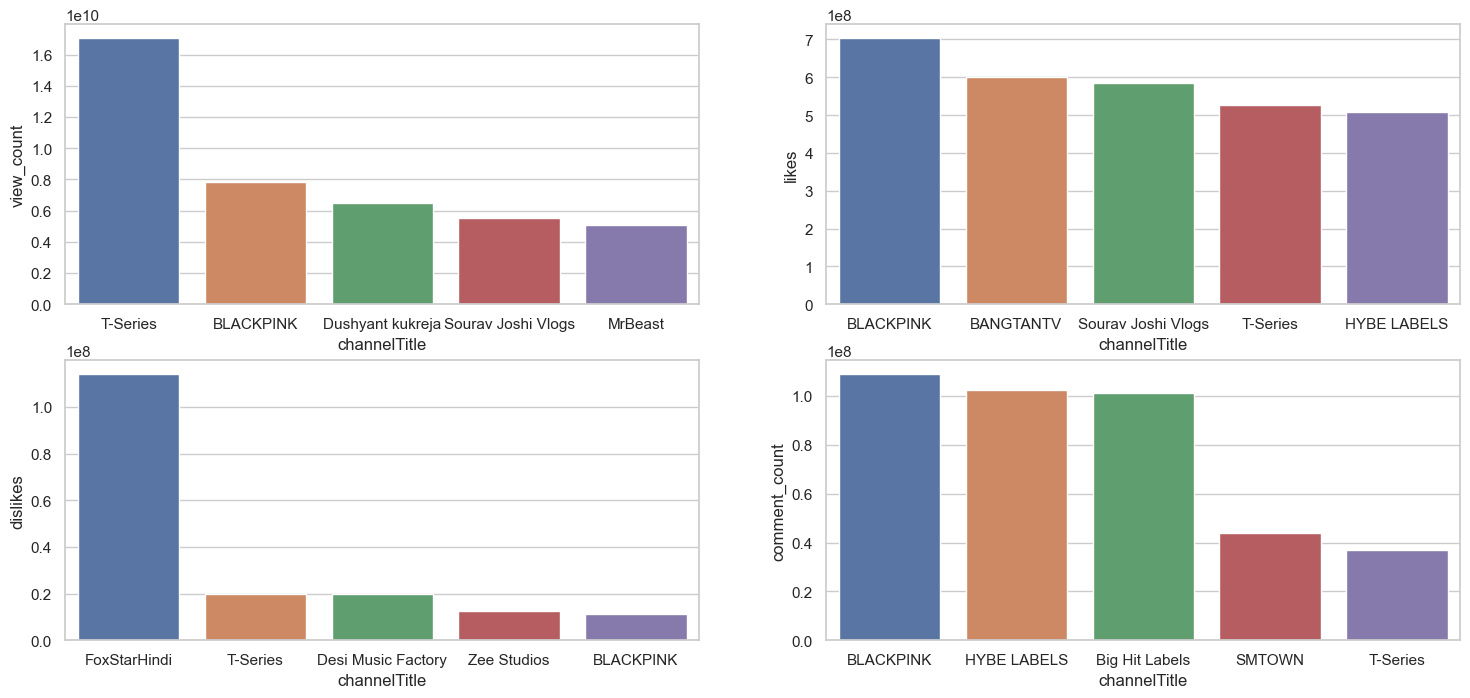

In [34]:
#Plotting the 5 channels with largest view count, likes, dislikes, comment_count
plt.figure(figsize = (18,8))
plt.subplot(2,2,1)

var_list = ['view_count','likes','dislikes','comment_count']

for i in range(0,4):
    plt.subplot(2,2,i+1)
    x = channel_group_df[var_list[i]].nlargest(5).index
    y = channel_group_df[var_list[i]].nlargest(5)
    sns.barplot(x = x,y = y)

T-series seems to be most viewed channel in India. Sourav Joshi vlogs are present in each of the top contenders of views,likes and comments.

FoxStarHindi leads the dislikes section reason being most disliked sadak 2 Movie trailer was from this channel. T-series with only being on in views not likes and comments finds itself in Disliked section.

Most of the disliked videos are coming from Entertainment type of Channels like movie production or music company channels.

BTS(Bangtan Sonyeondan - Korean Bulletproof Boy Scouts - Korean Pop Music Band) Channels are also leading in comments and likes with Korean girls channel Blackpink. 

# Most Watched Category

In [36]:
category_group_df = df.groupby(by = ['Video_Category']).sum()
category_group_df

,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
Video_Category,,,,,,,
Anime/Animation,71247,12256128274,372824316,8723701,18532219,12,5
Autos & Vehicles,3347,12107400329,401380575,18004648,20449204,23,27
Classics,18164,1523350741,113643780,1132093,3790575,5,3
Comedy,368790,144019437825,8126163621,177940950,914262141,57,200
Drama,555918,71303725669,4458096488,42504145,104804465,305,632
Family,290720,38038250623,2710583126,36232633,92097034,84,106
Foreign,1396296,162793384779,7475993010,254035180,274269626,501,350
Horror,109325,4734824310,94431618,11479834,10313938,187,344
Music,1788,1487988710,76711878,1575311,1281716,4,8


In [37]:
category_group_df[category_group_df['view_count'] == category_group_df['view_count'].max()]

,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
Video_Category,,,,,,,
Foreign,1396296,162793384779,7475993010,254035180,274269626,501,350


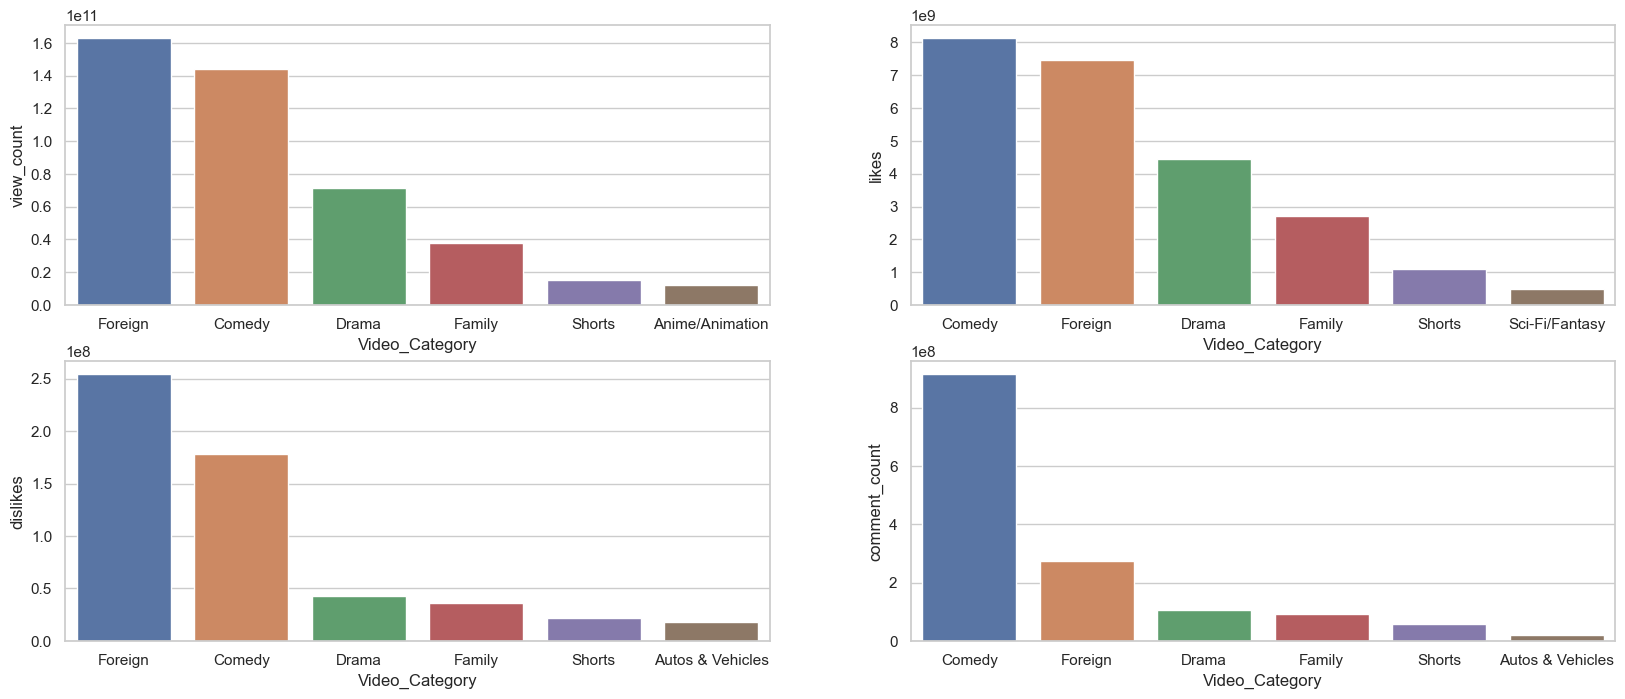

In [39]:
#Plotting the 5 categories with largest view count, likes, dislikes, comment_count}
plt.figure(figsize = (20,8))
plt.subplot(2,2,1)

var_list = ['view_count','likes','dislikes','comment_count']

for i in range(0,4):
    plt.subplot(2,2,i+1)
    x = category_group_df[var_list[i]].nlargest(6).index
    y = category_group_df[var_list[i]].nlargest(6)
    sns.barplot(x = x,y = y)

# Least Watched Category

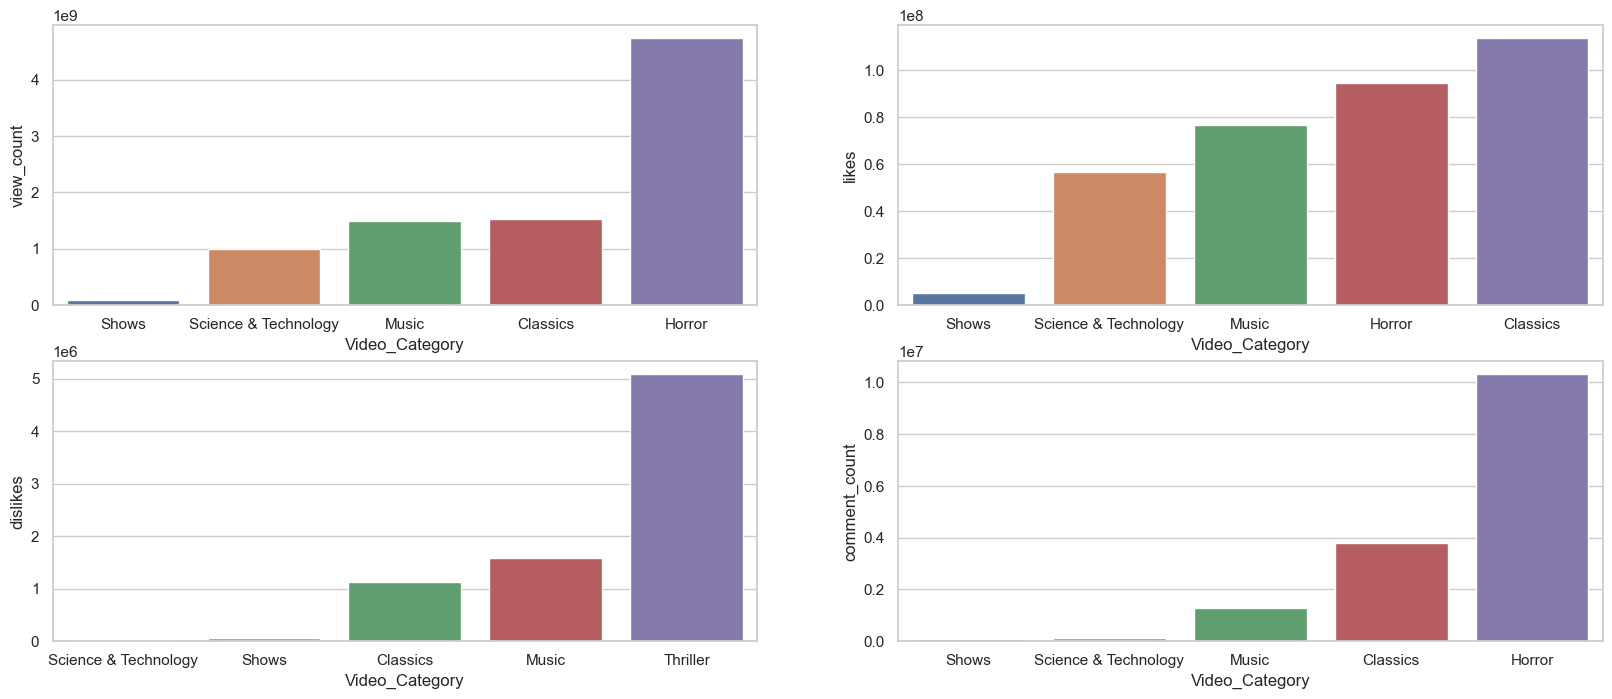

In [40]:
# Plotting the 5 categories with smallest view_count, likes, dislieks,commen_count
plt.figure(figsize = (20,8))
plt.subplot(2,2,1)

var_list = ['view_count','likes','dislikes','comment_count']

for i in range(0,4):
    plt.subplot(2,2,i+1)
    x = category_group_df[var_list[i]].nsmallest(5).index
    y = category_group_df[var_list[i]].nsmallest(5)
    sns.barplot(x = x,y = y)

**Shows** are the least watched category and least like as well

# Follow up Analysis

But is that right way of analysis?

1. Dislikes would be more as there are more views. Shouldn't we consider the percentage ?
2. Does highest views say that the public are highly interested in watching those Category videos?

Let's dive deep further to understand even more



Usually, In most cases, viewers just watch the video and turn to other video without Liking/Disliking/Commenting. But if they responded to a video in like/comment/dislike then that does signifies something and we need to capture that.

Let's create a Response percentage column which signifies the public response to a video and engagement b/w viewers and the video

In [43]:
df_View_Analysis['Response_Percentage'] = round(((df_View_Analysis.Likes + df_View_Analysis.Dislikes)/ df_View_Analysis.view_count)* 100,2)

df_View_Analysis

,Video_Category,view_count,Likes,Dislikes,Response_Percentage
0,Anime/Animation,3409452140,101326230,2255995,3.04
1,Autos & Vehicles,2882587134,93430979,3239950,3.35
2,Classics,557540087,40832359,321287,7.38
3,Comedy,34521044813,1822401152,36199371,5.38
4,Drama,20963188680,1330160004,11947340,6.40
5,Family,9694596165,642567874,7348410,6.70
6,Foreign,48004512563,2031051486,48974942,4.33
7,Horror,1533432090,29184442,3136659,2.11
8,Music,406558072,20035514,407200,5.03
9,Sci-Fi/Fantasy,2521392914,143084727,1975857,5.75


# Public Response vs Type of Videos

Text(0, 0.5, 'Public Response(in percentage)')

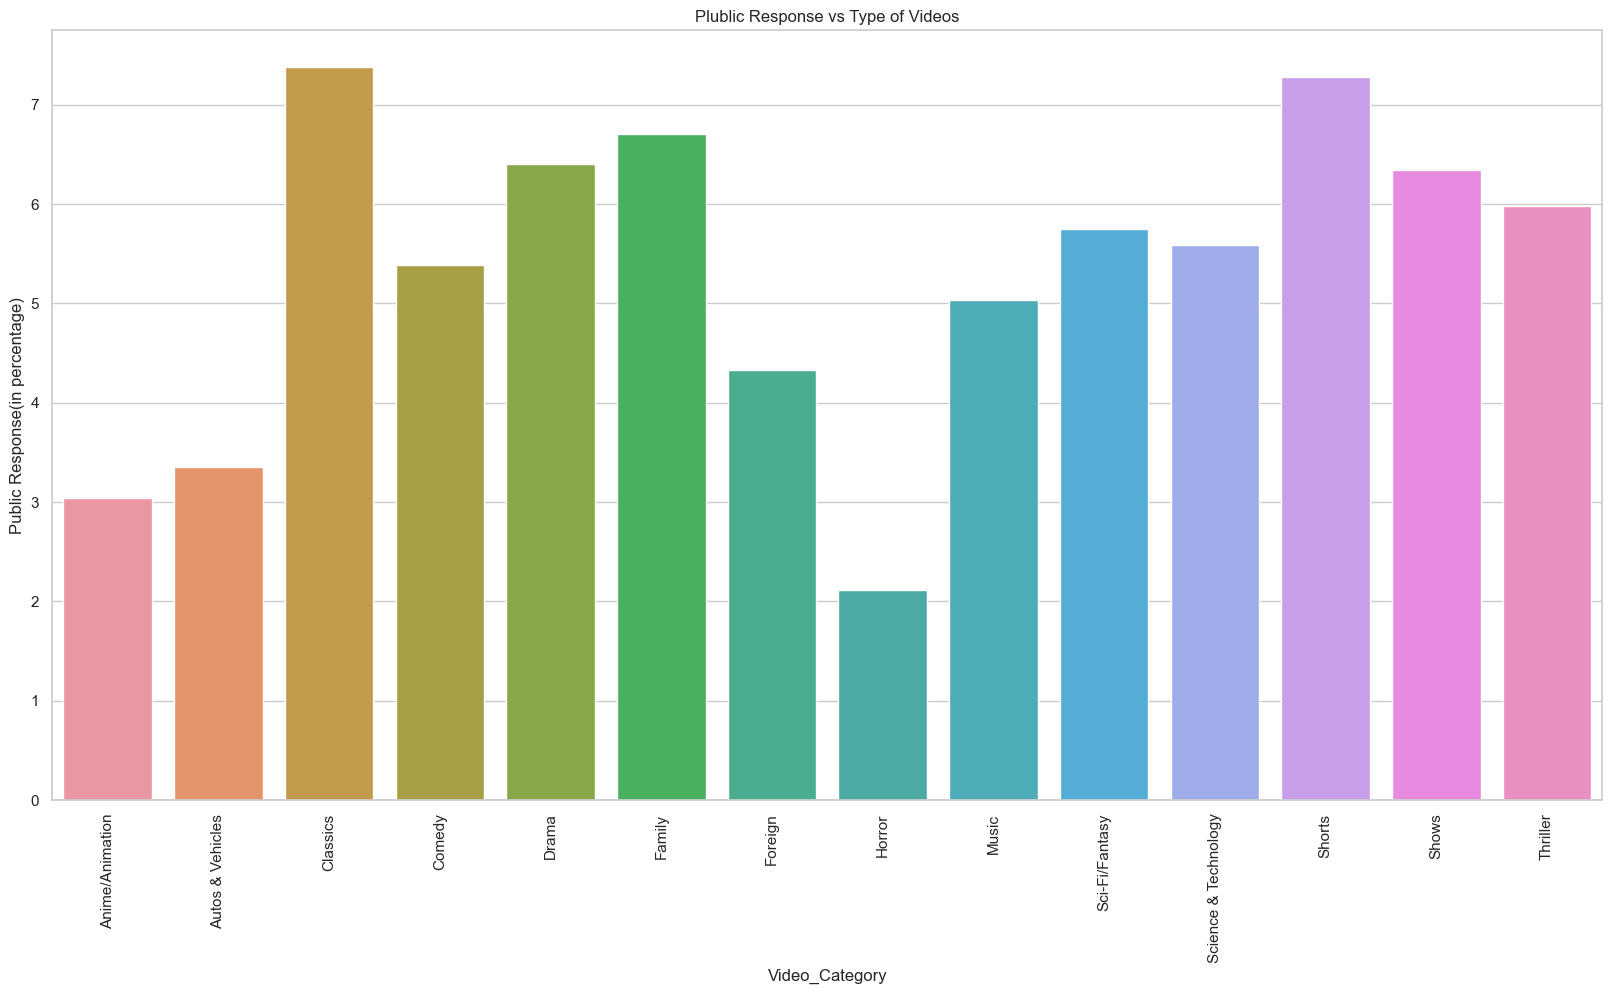

In [44]:
# Set the width and height of the figure
plt.figure(figsize = (20,10))

# Add title
plt.title("Plublic Response vs Type of Videos")
plt.xticks(rotation=90)

sns.barplot(x=df_View_Analysis.Video_Category, y = df_View_Analysis.Response_Percentage)

# Add label for verticle axis
plt.ylabel("Public Response(in percentage)")

So now, We can see that Viewers are highly reacting to Classics, Drama, Family, Sports, Sci-fi/Fantacy Videos. 

Let's randomly see what those videos are:

In [48]:
df_maxViews[df_maxViews.Video_Category.isin(["Sports", "Classics"])].sample(20)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,Video_Category
109946,19X4BrDbDsw,Oru Sanchariyude Diary Kurippukal | EPI 424 | ...,2022-03-06T04:30:00Z,Safari,19,2022-03-09T00:00:00Z,safari tv|santhosh george kulangara|sancharam|...,299657,7721,0,518,False,False,Please Like & Subscribe Safari Channel: https:...,Classics
82612,tPMcq8a8TK4,Yamaha R15 V4 M Detailed Malayalam Review,2021-10-16T15:43:10Z,Strell In Malayalam,19,2021-10-20T00:00:00Z,yamaha r15 v4 new model 2021|yamaha r15 v4 mal...,270972,35743,203,2109,False,False,Yamaha R15 V4 M Detailed Malayalam ReviewQuick...,Classics
117190,ud03MPGSrvY,Birthday Gift കൊടുക്കാൻ UKക്ക് പോയി.. പക്ഷെ.. ...,2022-04-12T11:30:19Z,Fishing Freaks,19,2022-04-15T00:00:00Z,kerala|fishing|traditional|kerala fishing|snak...,946173,65476,0,911,False,False,Visit our website:https://fishingfreaks.inClic...,Classics
58873,Q5xBeC1UJeU,We are back home with our Kutti Bhakthan,2021-06-15T12:44:40Z,Tech Travel Eat by Sujith Bhakthan,19,2021-06-19T00:00:00Z,Swetha Bhakthan|Tech Travel Eat|sujith bhakthan,486915,36576,1619,3001,False,False,We are back home with our Kutti Bhakthan,Classics
74610,b_LHgFyOGKw,"1,50,000/- രൂപയുടെ കിളിയെ വാങ്ങി.. Bought Blue...",2021-09-07T11:31:01Z,Fishing Freaks,19,2021-09-10T00:00:00Z,kerala|fishing|traditional|kerala fishing|snak...,1319275,139266,2951,16529,False,False,Download WinZO app: https://winzo.onelink.me/V...,Classics
7769,hlcdSzUTeGY,GUYS പണി പാളി 😒 എന്നെ ഇവർ പൊക്കി,2020-09-17T08:15:01Z,Mallu Traveler,19,2020-09-21T00:00:00Z,mallu traveler europe ride|best malayalam trav...,720498,51632,3197,12369,False,False,hello on this video we are exploring Dubai tou...,Classics
143989,i-BxZzq-2NI,Kya aap kisi darpok ko jaante ho? #littleglov...,2022-08-27T13:27:49Z,LittleGlove,19,2022-08-28T00:00:00Z,[None],2263533,146597,0,401,False,False,NaN,Classics
58651,Hnt_X8w74nI,കടയിലെ മുഴുവൻ angel മീനെയും മേടിച്ചു | Bought ...,2021-06-15T11:30:02Z,Fishing Freaks,19,2021-06-17T00:00:00Z,kerala|fishing|traditional|kerala fishing|snak...,958734,85437,1453,8154,False,False,ഇപ്പൊ 5% discount ഉണ്ട് കേട്ടോ ദേ ലിങ്ക് http...,Classics
34166,YfrCuQPMAcw,"ടയർ പഞ്ചറായി,ഫോറസ്സ്കാർ തെറി പറഞ്ഞു, മൊത്തം പ്...",2021-02-14T11:33:41Z,Mallu Traveler,19,2021-02-15T00:00:00Z,[None],1022554,79478,5953,7244,False,False,NaN,Classics
148412,OnOucot9fQk,Part-1) भाई बहन का प्यार💜🥺||brother sister lov...,2022-09-16T19:33:44Z,Kanxhii Vlogs,19,2022-09-19T00:00:00Z,[None],192570,0,0,3,False,True,भाई बहन का प्यार💜🥺||brother sister love || sub...,Classics


Let's create Similar Percentages and see what they infer

In [50]:
df_View_Analysis["LikesPercentage"] = df_View_Analysis.Likes*100/df_View_Analysis.view_count
df_View_Analysis["DislikesPercentage"] = df_View_Analysis.Dislikes*100/df_View_Analysis.view_count
df_View_Analysis["Comments"] = df_Comments["comment_count"]
df_View_Analysis["CommentsPercentage"] = df_View_Analysis.Comments*100/df_View_Analysis.view_count
df_View_Analysis

,Video_Category,view_count,Likes,Dislikes,Response_Percentage,LikesPercentage,DislikesPercentage,Comments,CommentsPercentage
0,Anime/Animation,3409452140,101326230,2255995,3.04,2.971921,0.066169,4980619,0.146083
1,Autos & Vehicles,2882587134,93430979,3239950,3.35,3.241220,0.112397,4177745,0.144930
2,Classics,557540087,40832359,321287,7.38,7.323663,0.057626,1194838,0.214305
3,Comedy,34521044813,1822401152,36199371,5.38,5.279102,0.104862,176845011,0.512282
4,Drama,20963188680,1330160004,11947340,6.40,6.345218,0.056992,30713548,0.146512
5,Family,9694596165,642567874,7348410,6.70,6.628104,0.075799,17219247,0.177617
6,Foreign,48004512563,2031051486,48974942,4.33,4.230960,0.102022,62034194,0.129226
7,Horror,1533432090,29184442,3136659,2.11,1.903211,0.204552,3012019,0.196423
8,Music,406558072,20035514,407200,5.03,4.928082,0.100158,415788,0.102270
9,Sci-Fi/Fantasy,2521392914,143084727,1975857,5.75,5.674829,0.078364,3398208,0.134775


<AxesSubplot:xlabel='Video_Category'>

<Figure size 2000x1000 with 0 Axes>

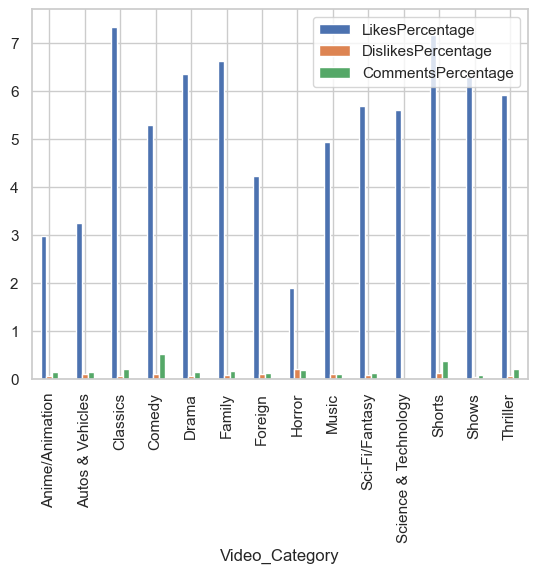

In [52]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

df_View_Analysis.plot(x="Video_Category", y =["LikesPercentage", "DislikesPercentage", "CommentsPercentage"], kind = "bar")

# CommentsPercentage vs Type of Videos

Text(0, 0.5, 'Comments')

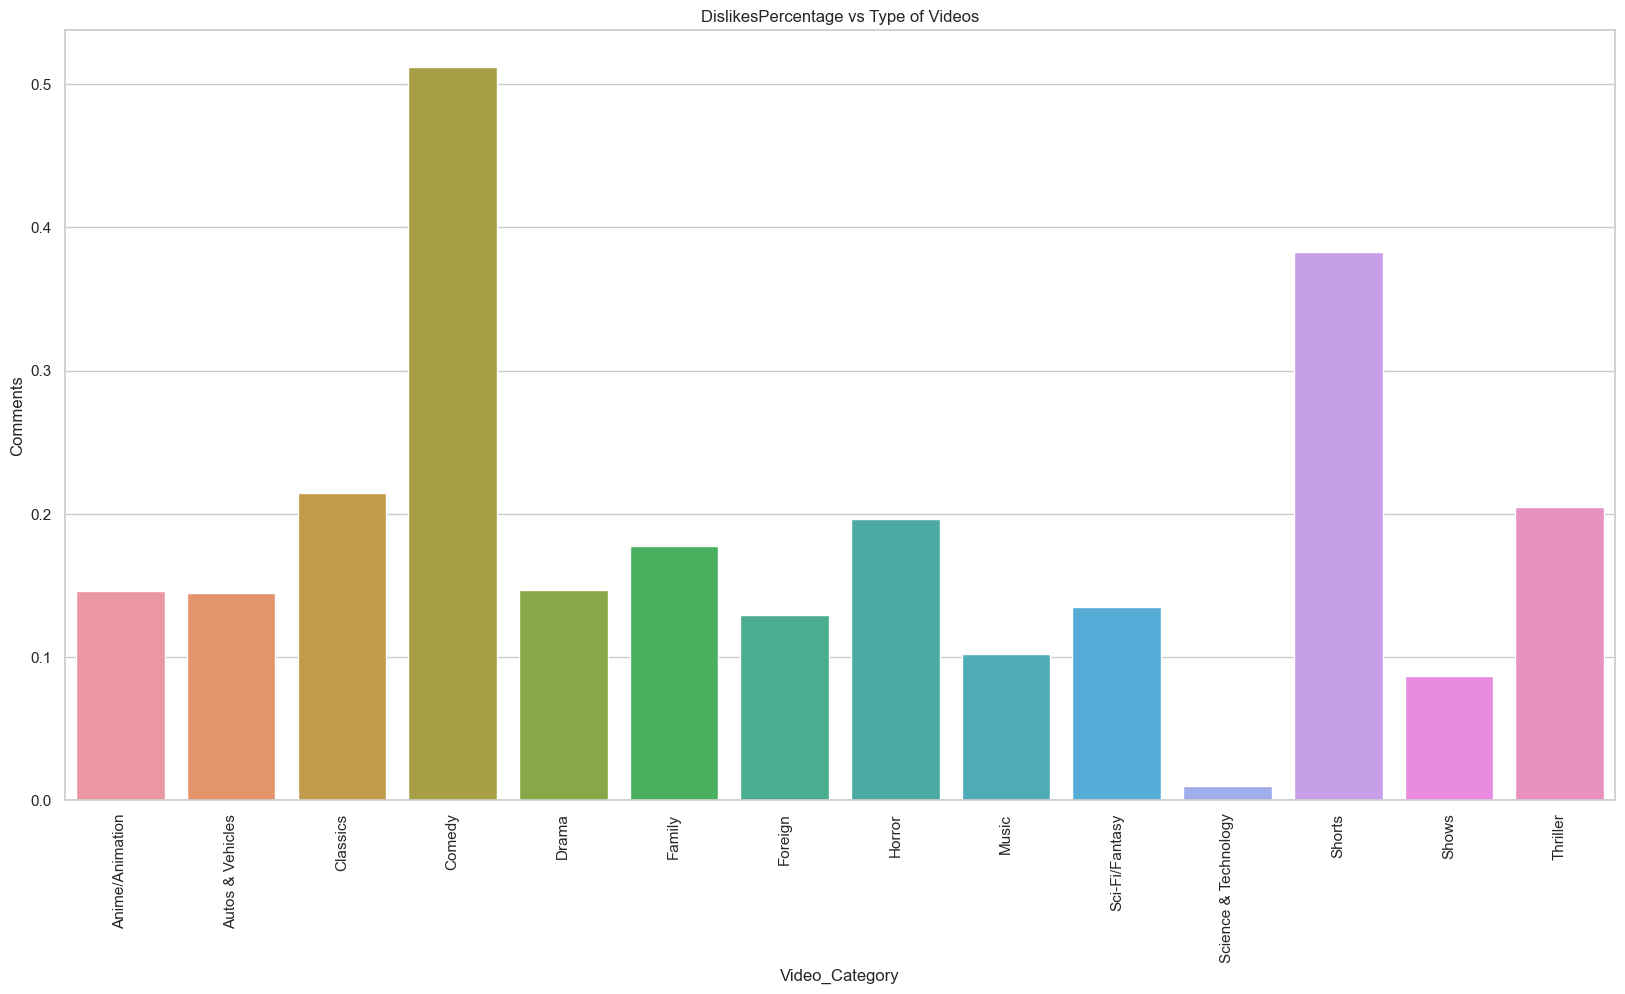

In [56]:
# Set the width and the height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("DislikesPercentage vs Type of Videos")
plt.xticks(rotation=90)

sns.barplot(x=df_View_Analysis.Video_Category, y=df_View_Analysis.CommentsPercentage)

# Add label of verticle axis

plt.ylabel("Comments")



Comedy and Shorts has the most comments.

Text(0, 0.5, 'Dislikes')

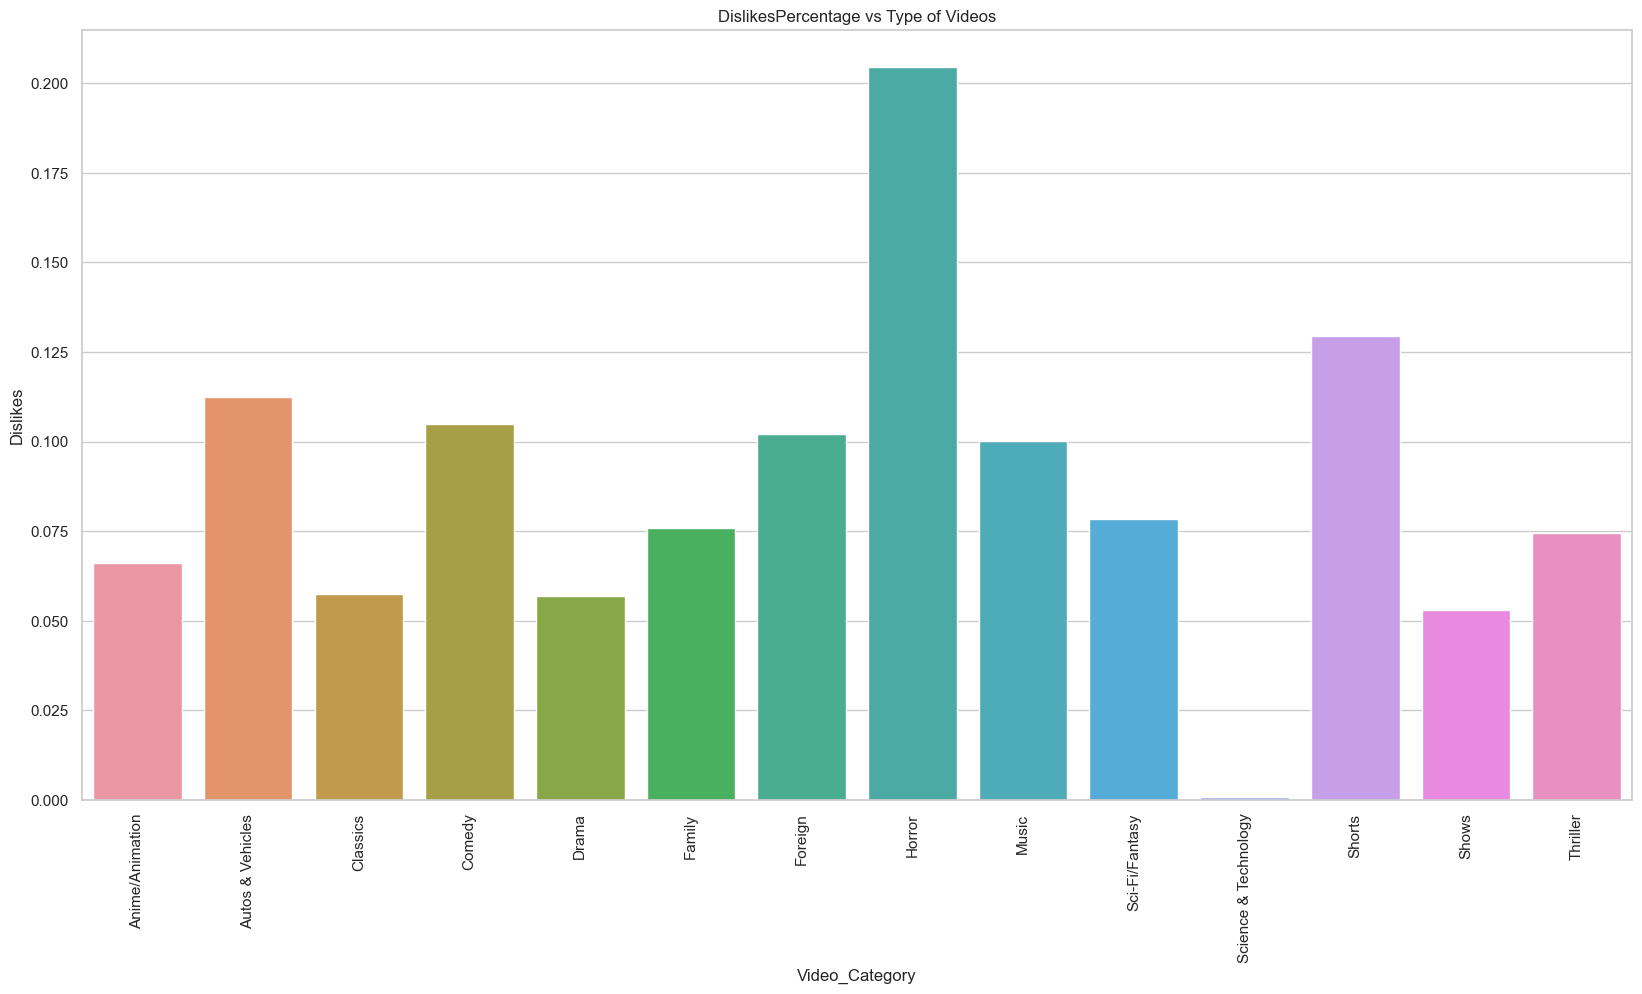

In [55]:
# Set the width and the height of the figure
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)

# Add title
plt.title("DislikesPercentage vs Type of Videos")

sns.barplot(x=df_View_Analysis.Video_Category, y=df_View_Analysis.DislikesPercentage)

# Add label of verticle axis

plt.ylabel("Dislikes")

**Horror** movies seems to receive the most dislikes

# LikesPercentage vs Type of Videos

Text(0, 0.5, 'Likes')

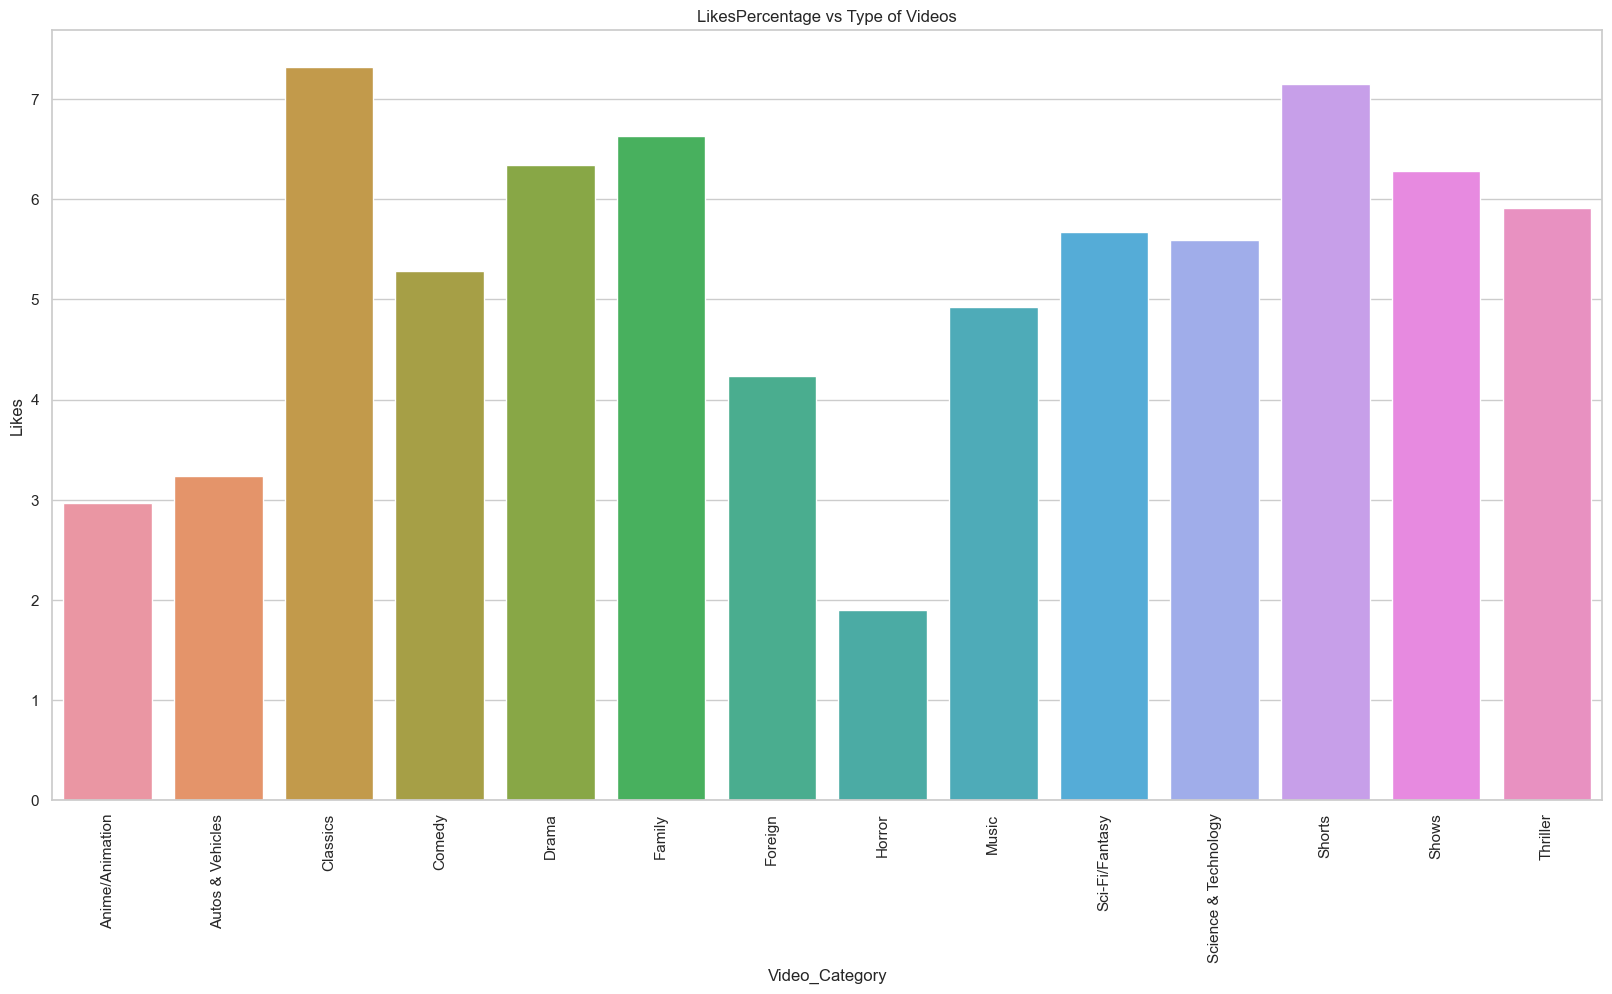

In [58]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)

# Add title
plt.title("LikesPercentage vs Type of Videos")

sns.barplot(x=df_View_Analysis.Video_Category, y=df_View_Analysis.LikesPercentage)

# Add label for vertical axis
plt.ylabel("Likes")

**Classics, Shorts** and **Family** movies seems to receive the most likes

# Channel Analysis

In [63]:
df_Channel = df_maxViews.groupby('channelTitle')['view_count'].sum().reset_index()
df_Like = df_maxViews.groupby('channelTitle')['likes'].sum().reset_index()
df_Dislike = df_maxViews.groupby('channelTitle')['dislikes'].sum().reset_index()
df_Comments = df_maxViews.groupby('channelTitle')['comment_count'].sum().reset_index()
df_Channel['Likes'] = df_Like.likes
df_Channel['Dislikes'] = df_Dislike.dislikes
df_Channel["Comments"] = df_Comments.comment_count

df_Channel.sample(10)

,channelTitle,view_count,Likes,Dislikes,Comments
2715,SURESH IAS ACADEMY,1845024,26610,48,2839
3208,TIPS N TRICKS,303756,8431,119,2221
3336,Thanthi TV,37589916,519778,32486,44378
935,ETV Jabardasth,308657992,6250410,249134,174540
1210,Govind's Thought Shorts,14781974,1080841,6316,5299
1399,Indu's Kitchen,17886286,1169134,0,4483
403,Ayshus World,649098,30154,1870,3141
3343,The Bong Guy,15980763,2895199,36490,191945
2449,Puri Jagannadh,32208876,1023862,8916,34825
1930,Meenu Lakshmi,4185856,174025,0,1086


In [64]:
df_Channel.sort_values('view_count',ascending=False).iloc[:25,:]

,channelTitle,view_count,Likes,Dislikes,Comments
3174,T-Series,3605729251,96610966,3847392,6630604
3624,Vijay Television,2546942360,54654378,909236,3134836
3027,Sourav Joshi Vlogs,2248052445,223933074,1032729,10369759
915,Dushyant kukreja,1667219165,97914610,1859647,336732
442,BLACKPINK,1583164945,136256960,1912398,17694285
2042,MrBeast,1256389734,83415829,566834,4691285
726,Crazy XYZ,1213024080,105160576,2131297,6286459
174,Ajay Sharma,1092146916,55418519,1379520,92375
3009,Sony Music India,1020569225,22149631,1065808,2987260
1260,HYBE LABELS,1016062898,102838507,531216,20575336


# Channel vs Total Views

Text(0, 0.5, 'Total Views')

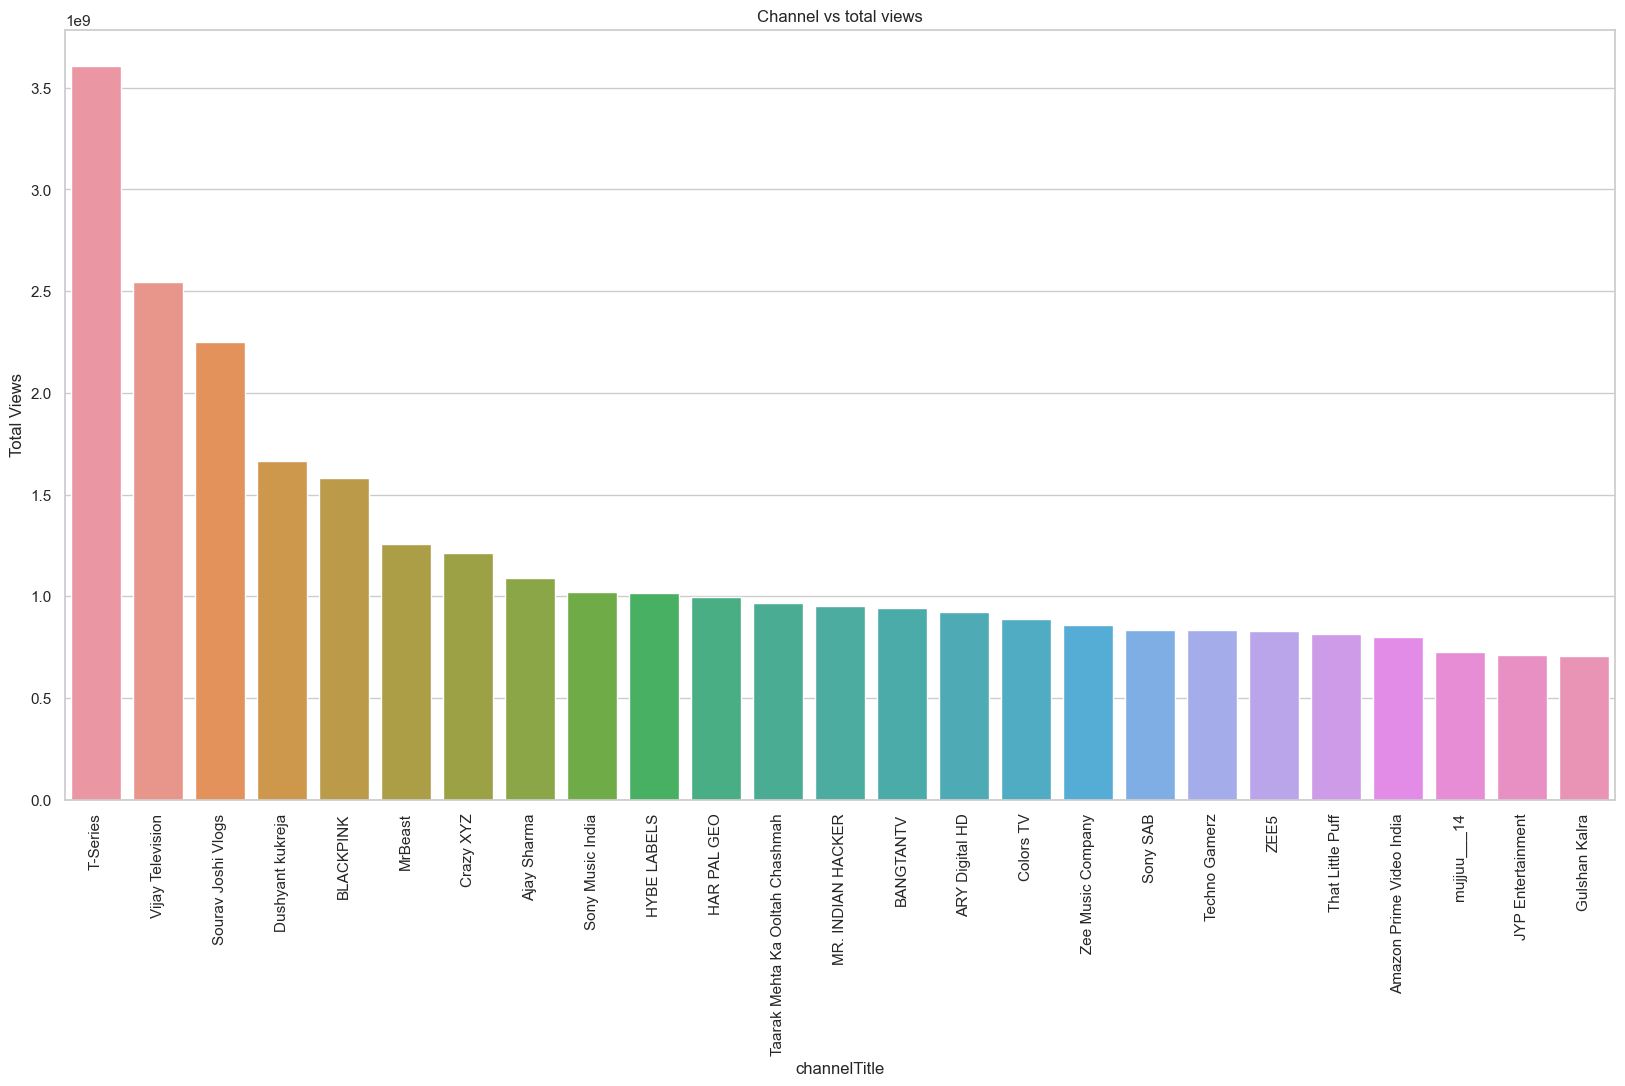

In [66]:
Channel_Views = df_Channel.sort_values('view_count', ascending = False).iloc[:25,:]
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Channel vs total views")
plt.xlabel
plt.xticks(rotation = 90)

sns.barplot(x=Channel_Views.channelTitle, y =Channel_Views.view_count)

# Add label for verticle axis
plt.ylabel("Total Views")

# Channel vs Total Likes

Text(0, 0.5, 'Total Likes')

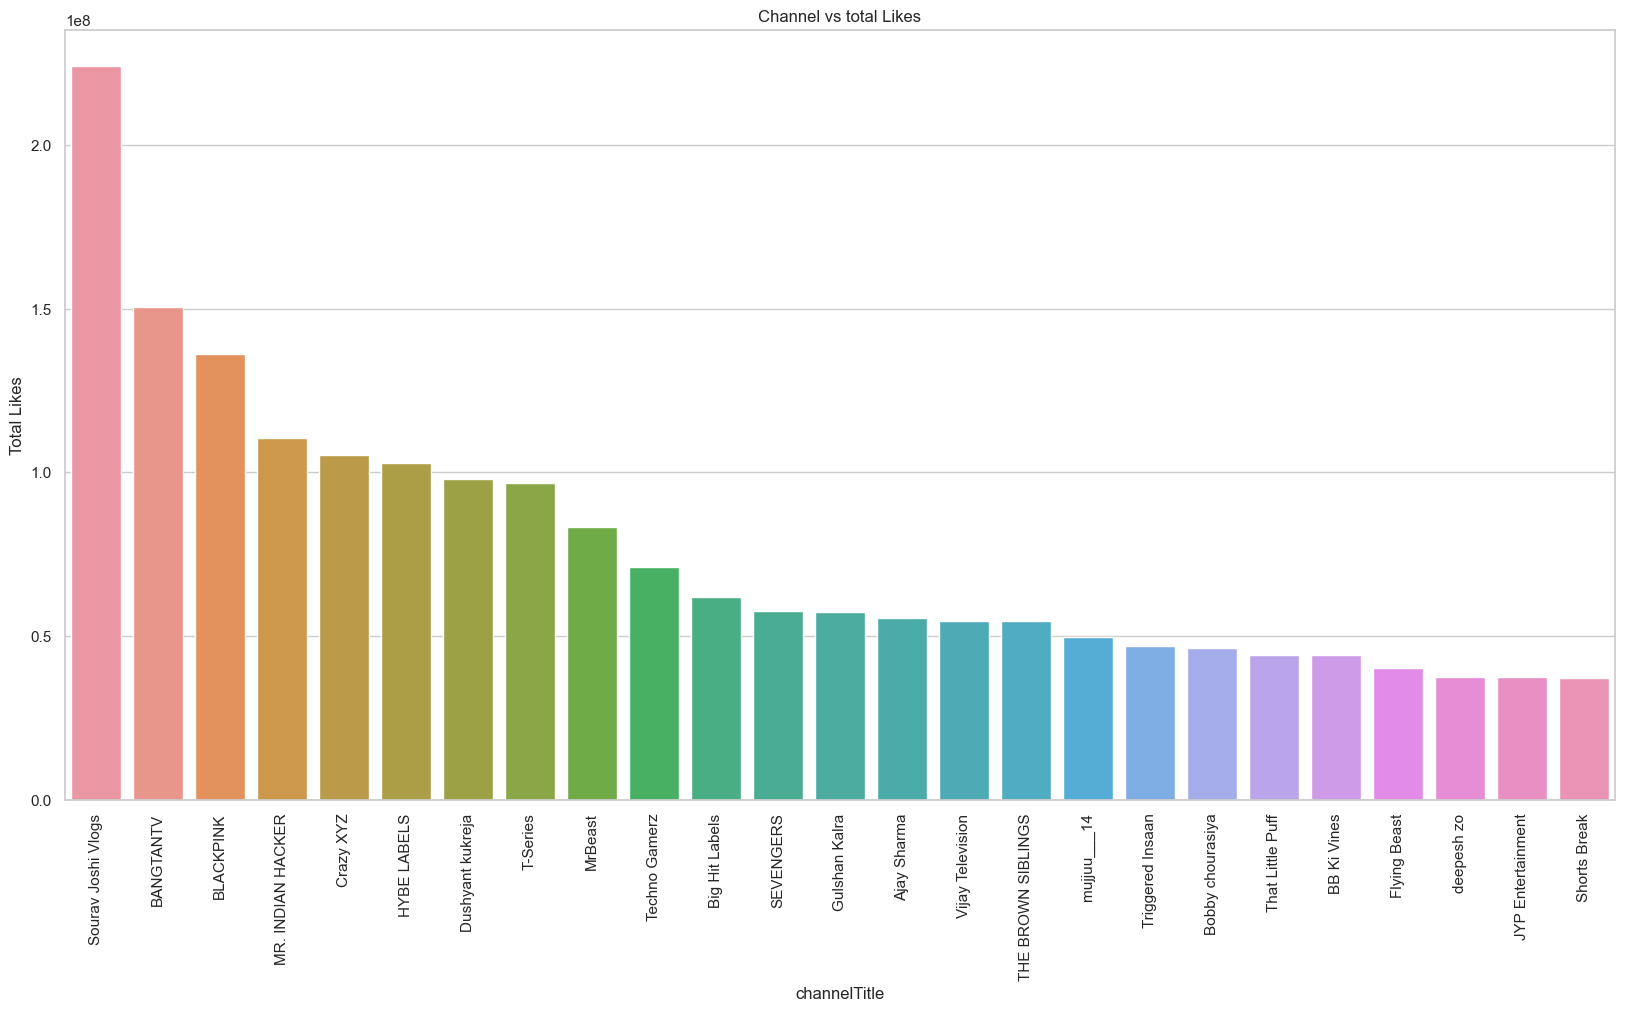

In [67]:
Channel_Views = df_Channel.sort_values('Likes', ascending=False).iloc[:25,:]
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Channel vs total Likes")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=Channel_Views.channelTitle, y=Channel_Views.Likes)

# Add label for vertical axis
plt.ylabel("Total Likes")


# Channel vs Total Comments

Text(0, 0.5, 'Total Comments')

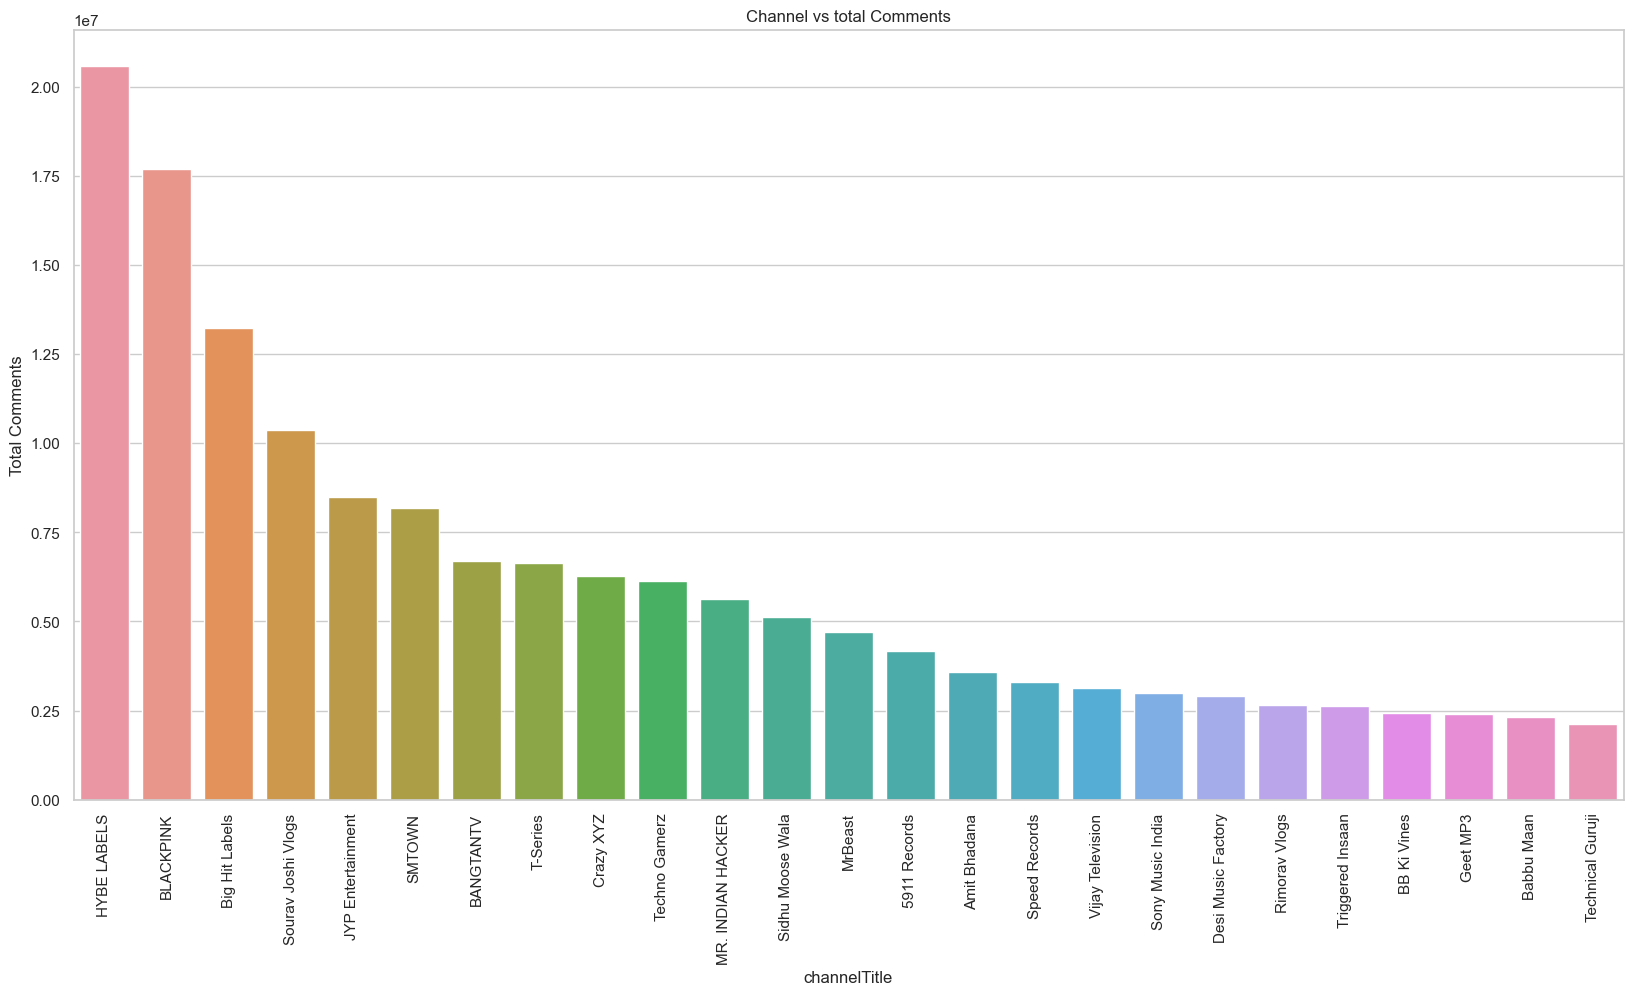

In [68]:
Channel_Views = df_Channel.sort_values('Comments', ascending=False).iloc[:25,:]
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Channel vs total Comments")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=Channel_Views.channelTitle, y=Channel_Views.Comments)

# Add label for vertical axis
plt.ylabel("Total Comments")

In [69]:
NoofDaysInTrending = dict(df.groupby('video_id')['view_count'].count())
NoofDaysInTrending

{'--9rRxqTdjQ': 4,
 '--GS_EPuuMc': 3,
 '--L_wDHUaxY': 4,
 '--WGlFF6-yw': 5,
 '--vmXGvtqxQ': 4,
 '--xmP5nOoLM': 1,
 '-00zRvr9zyA': 5,
 '-05Hay2JrKg': 1,
 '-0Da_UPrV10': 2,
 '-0PR_BkK60E': 1,
 '-0Qa7hB2vXI': 1,
 '-0SOJVfKX00': 5,
 '-0beFQnB5lY': 5,
 '-0gtaC4AzHA': 3,
 '-0ldvhBlL-k': 7,
 '-0oRa0QXx6I': 5,
 '-0udX1wZ82U': 2,
 '-0wc4B969z0': 4,
 '-13QFm5vAoY': 4,
 '-19EvIcr9ZA': 5,
 '-1EIBWRRj4U': 1,
 '-1ImKHHc7Ck': 5,
 '-1QZHe8x2G0': 6,
 '-1dLG2z61hQ': 2,
 '-1ddUMd4BRw': 2,
 '-1i1gagGtu4': 5,
 '-1kFl7EWFqs': 2,
 '-1lRI4dseeA': 2,
 '-1pQX88fnUQ': 5,
 '-28tVGVeM_Q': 3,
 '-29uvnpHjpI': 1,
 '-2CYiqoM3BA': 4,
 '-2DOCcpdTS0': 5,
 '-2RBOk_RzA0': 6,
 '-2RJTVPSOPc': 1,
 '-2WasASWxgo': 2,
 '-2_qmj_X04o': 3,
 '-2a-DFvWa0k': 3,
 '-2dqKYHewY0': 3,
 '-2draG1JbKA': 3,
 '-3AQa1eM_PU': 2,
 '-3A_ptUS5_g': 4,
 '-3HiGsaH4Ew': 5,
 '-3IcQ3RygGE': 2,
 '-3KzmJPgHu4': 3,
 '-3LbftaK6jM': 2,
 '-3XxzOSIvZ8': 5,
 '-3_fPBahI_0': 1,
 '-3z4u6AHBxg': 3,
 '-3zqU_Z6T3o': 4,
 '-47LcGA8Fp4': 4,
 '-4L_ZLzYdlU': 3,
 '-4escF5itQ

In [70]:
def fetch_video_times(value):
    return NoofDaysInTrending[value]

Let's try to find the Channels that have their videos in trending for most of the times.

In [71]:
df_maxViews['times_in_trending'] = df_maxViews.video_id.apply(fetch_video_times)

In [72]:
df_maxViews.sample(5)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,Video_Category,times_in_trending
116037,h6wyHwqtN3o,FreeFire ലെ ഏറ്റവും ഭാഗ്യം ഇല്ലാത്ത YOUTUBER 😱...,2022-04-06T14:44:09Z,UNTOLD GAMER,20,2022-04-09T00:00:00Z,[None],99500,18708,0,1611,False,False,NaN,Comedy,3
80972,yvDNjZvrf2s,Hero Shivaji Reaction on MAA Election Result 2...,2021-10-10T16:14:37Z,TV5 News,25,2021-10-12T00:00:00Z,tv5 news|tv5 digital|maa elections|maa 2021|ma...,1005681,9992,1807,2172,False,False,Hero Shivaji Reaction on MAA Election Result 2...,Horror,2
76424,rqYSfREOvG4,Ajjubhai and Namo vs World Best Player | 2 vs ...,2021-09-18T04:00:15Z,Total Gaming,20,2021-09-19T00:00:00Z,free fire|garena free fire|total gaming,1251832,155801,4337,7715,False,False,Ajjubhai and Namo vs World Best Player 2 vs 4 ...,Comedy,1
116421,waX0JVOVcXQ,Chintu love meter ❤️😂| Fault Family | Velujazz,2022-04-08T12:29:46Z,Velujazz official,22,2022-04-11T00:00:00Z,velujazz|velu reels|velu jazz official|velu mo...,793493,22122,0,254,False,False,#chintu #faultfamily #velujazzWatch and subscr...,Drama,3
58318,TIguVZsl1hg,Rechipodam Brother | 14th June 2021 | Full Epi...,2021-06-14T17:00:26Z,ETV Plus India,23,2021-06-16T00:00:00Z,Rechipodam Brother|Rechipodam Brother show|Rec...,378443,6069,317,326,False,False,#RechipodamBrother #TeluguComedyShow #ETVWinCo...,Family,2


Top 25 Videos that are in trending for many days

In [74]:
df_trend_video_tt = df_maxViews.sort_values('times_in_trending', ascending = False).iloc[:25,:]
df_trend_video_tt

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,Video_Category,times_in_trending
58680,y_RHQ4mBDKA,"Bedardi Se Pyaar Ka Song|Jubin N,Meet B,Manoj ...",2021-06-08T05:30:44Z,T-Series,10,2021-06-17T00:00:00Z,Bedardi Se Pyaar Ka|Bedardi Se Pyaar Ka song|B...,46351646,1585497,44771,77470,False,False,Gulshan Kumar & T-Series presents Bhushan Kuma...,Comedy,19
56632,pYDdDIdiSFY,KFC Style Crispy Chicken Fry🍗 #Jamamasjid #del...,2021-06-02T07:25:15Z,INDIA EAT MANIA,24,2021-06-12T00:00:00Z,[None],29970151,636668,43574,5711,False,False,#kfcchicken #jamamasjidchicken #chickenfry #ja...,Foreign,18
56622,KVh4KtUSW3A,"Baarish Ban Jaana (Official Video) Payal Dev, ...",2021-06-03T05:30:20Z,VYRLOriginals,10,2021-06-12T00:00:00Z,vyrl originals|vyrl original|hina khan|shaheer...,46199357,984341,33052,110202,False,False,VYRL Originals brings to you yet another monso...,Comedy,18
54983,Hjj9nrjvpZo,She thought she pranked me 😂🤷‍♂️ #shorts,2021-05-28T09:30:01Z,Suyash Vlogs,24,2021-06-07T00:00:00Z,[None],42645272,691428,60115,1764,False,False,NaN,Foreign,17
54976,LtLJRNBHOKc,Online Parent Teacher Meeting | Ashish Chanchlani,2021-05-29T08:35:32Z,ashish chanchlani vines,23,2021-06-07T00:00:00Z,ashish chanchlani|ashish chanchlani vines|ashi...,20645862,2311665,31993,110663,False,False,"Download India's simplest Bitcoin app, CoinDCX...",Family,17
56996,GbwpvjAEZv0,Great Khali's Instagram is The Funniest - Try ...,2021-06-05T07:00:02Z,Triggered Insaan,23,2021-06-13T00:00:00Z,triggered insaan|live insaan|great khali|great...,10226184,1034148,28653,61954,False,False,We Tried Not to Laugh at The Great Khali's Ins...,Family,16
58637,nFjVlf2r9_Q,Badshah - Paani Paani | Jacqueline Fernandez |...,2021-06-09T06:30:27Z,Saregama Music,10,2021-06-17T00:00:00Z,paani paani|paani paani badshah|badshah new so...,76252340,1417028,153022,86156,False,False,Badshah x Jacqueline Fernandez x Aastha Gill a...,Comedy,16
57399,oiBif8SefIg,LOCKDOWN WITH COUSIN ( Episode -2 ) || Rachit ...,2021-06-06T04:07:00Z,Rachit Rojha,24,2021-06-14T00:00:00Z,rachit rojha|rachit rojha new video|lockdown w...,7987529,243058,19726,20730,False,False,Lockdown with Cousin comedy. ( Episode - 2 )--...,Foreign,16
56254,AzOvsmpQVKM,Jubin Nautiyal : Kabira (कबीर दोहे) | Raaj Aas...,2021-06-03T03:30:35Z,T-Series,10,2021-06-11T00:00:00Z,कबीर के दोहे|सन्त कबीर|कबीरदास|poet|popular do...,18970641,1363032,21272,80926,False,False,Gulshan Kumar & T-Series presents Bhushan Kuma...,Comedy,16
55515,2OtgYcd83Qg,"Jagame Thandhiram | Trailer | Dhanush, Aishwar...",2021-06-01T04:30:00Z,Netflix India,24,2021-06-09T00:00:00Z,netflix india|netflix|netflix shows|JagameThan...,11209237,571223,11929,27549,False,False,Sara-vedi oda Suruli ready!The film tells the ...,Foreign,16


<br>

Top Channels whose video is in trending for most of the times

# Channel's Video vs no.of times in Trending

Text(0, 0.5, 'no.of trending')

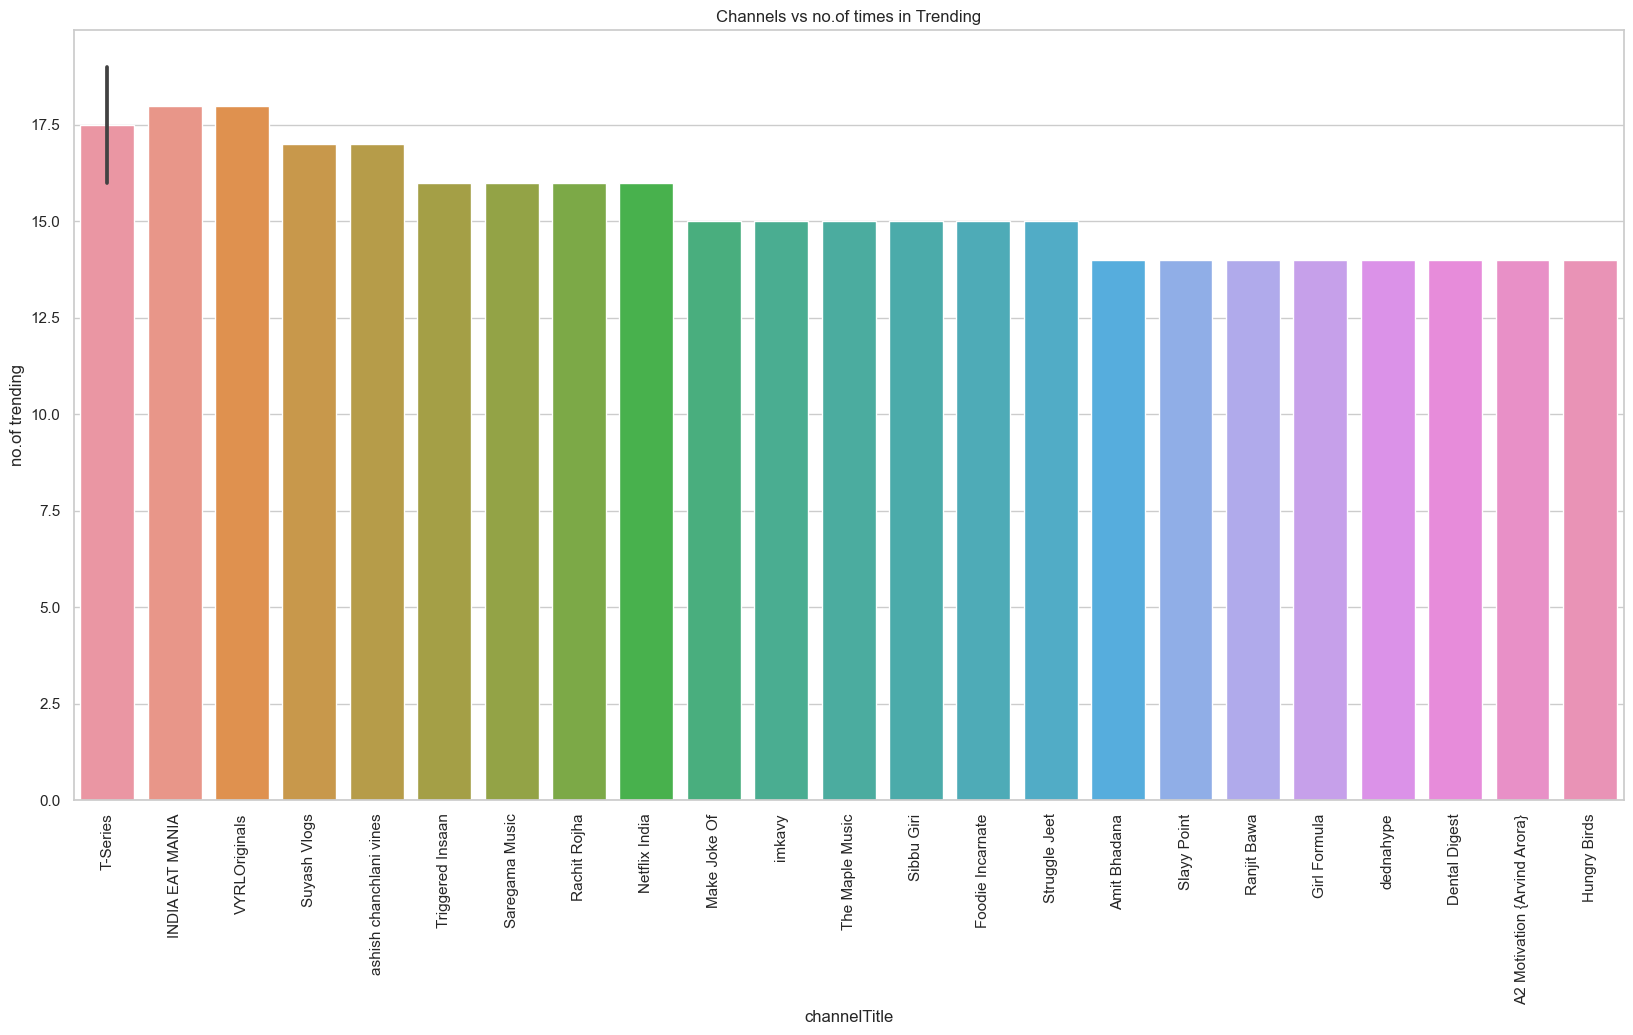

In [75]:
#Top 20 videos with most no.of times in trending(Channel wise)

# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Channels vs no.of times in Trending")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=df_trend_video_tt.channelTitle, y=df_trend_video_tt.times_in_trending)
#sns.violinplot(x = df_trend_video_tt.channelTitle, y = df_minViews.DaysTakenToBeOnTrending )

# Add label for vertical axis
plt.ylabel("no.of trending")

<br>


Top 30 Channels whose Videos are in Trending

In [76]:
df_Channel_Trending = df_maxViews.groupby("channelTitle")["times_in_trending"].sum().reset_index()
df_Channel_Trending["Majority_Videos_Category_Type"] = df_maxViews.groupby('channelTitle')['Video_Category'].agg(pd.Series.mode).reset_index()["Video_Category"]
df_Channel_Trending = df_Channel_Trending.sort_values('times_in_trending', ascending=False).iloc[:30,:]
df_Channel_Trending 

,channelTitle,times_in_trending,Majority_Videos_Category_Type
3624,Vijay Television,1759,Foreign
3027,Sourav Joshi Vlogs,1203,Drama
698,Colors TV,1147,Foreign
3015,Sony SAB,1030,Foreign
3783,ZEE5,1024,Foreign
726,Crazy XYZ,963,Shorts
374,Asianet,882,Foreign
3238,Taarak Mehta Ka Ooltah Chashmah,747,Foreign
3174,T-Series,726,Comedy
697,Colors Rishtey,664,Foreign


# Channel vs total no.of times in trending

Text(0, 0.5, 'no.of times in trending')

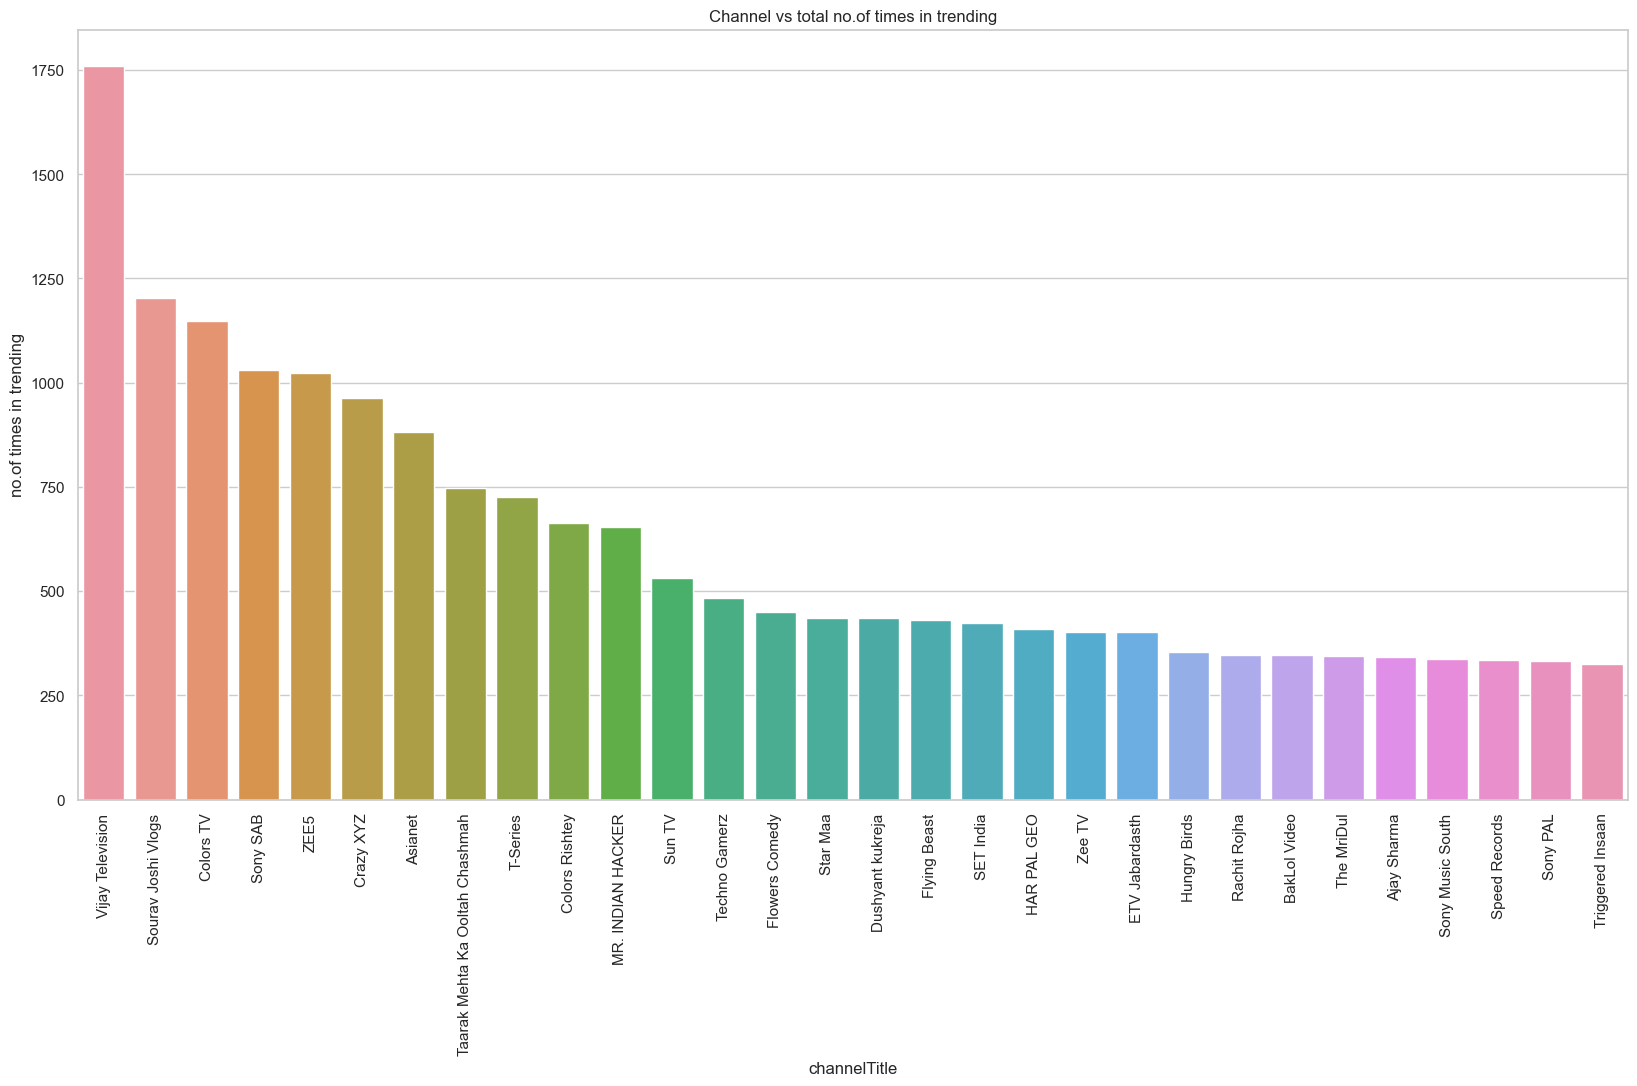

In [78]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Channel vs total no.of times in trending")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=df_Channel_Trending.channelTitle, y=df_Channel_Trending.times_in_trending)

# Add label for vertical axis
plt.ylabel("no.of times in trending")

Category of the Videos Uploaded of Top Channels which are in Trending

# Category vs total no.of times in trending

Text(0, 0.5, 'no.of times in trending')

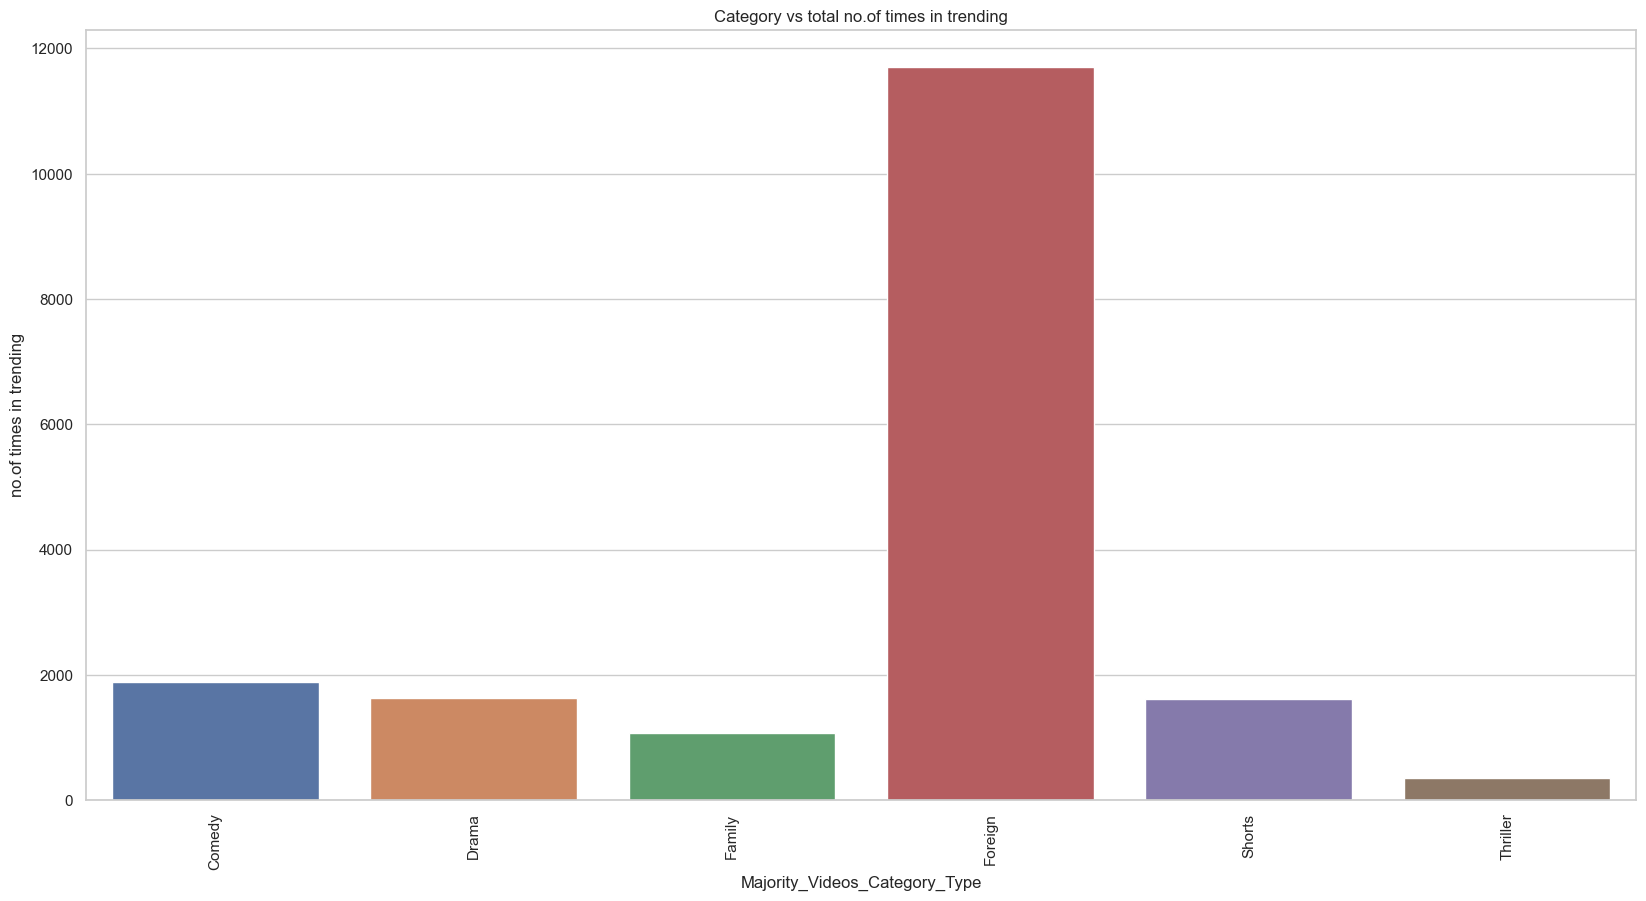

In [79]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Category vs total no.of times in trending")
plt.xlabel
plt.xticks(rotation=90)
Category_Trending = df_Channel_Trending.groupby("Majority_Videos_Category_Type")["times_in_trending"].sum().reset_index()
sns.barplot(x=Category_Trending.Majority_Videos_Category_Type, y=Category_Trending.times_in_trending)

# Add label for vertical axis
plt.ylabel("no.of times in trending")

<br>

Let's create a column which calculates no.days took for the video to be in Trending. 0 being less than 24hrs

In [80]:
df_minViews.trending_date

47639    2021-04-27T00:00:00Z
74296    2021-09-09T00:00:00Z
98148    2022-01-09T00:00:00Z
17317    2020-11-11T00:00:00Z
2760     2020-08-26T00:00:00Z
                 ...         
60487    2021-06-29T00:00:00Z
51371    2021-05-21T00:00:00Z
27368    2021-01-08T00:00:00Z
63673    2021-07-15T00:00:00Z
55573    2021-06-09T00:00:00Z
Name: trending_date, Length: 46294, dtype: object

In [81]:
df_minViews["JoinedTrending"] = pd.to_datetime(df_minViews.trending_date.str.split(',\s*').str[0]) #\s means matches "any whitespace character"
df_minViews["UploadedTime"] = pd.to_datetime(df_minViews.publishedAt.str.split(',\s*').str[0])
df_minViews["DaysTakenToBeOnTrending"] = (df_minViews["JoinedTrending"] - df_minViews["UploadedTime"]).dt.days
df_minViews['DaysTakenToBeOnTrending'] = df_minViews['DaysTakenToBeOnTrending'].apply(lambda x: 0 if x == -1 else x)
df_minViews.sample(10)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,Video_Category,JoinedTrending,UploadedTime,DaysTakenToBeOnTrending
146867,ra1dkGuHPxo,Ky samaj rahi thi 🤣😎 #shorts #funny,2022-09-09T14:44:55Z,Bobby chourasiya,22,2022-09-12T00:00:00Z,[None],8607300,798133,0,501,False,False,NaN,Drama,2022-09-12 00:00:00+00:00,2022-09-09 14:44:55+00:00,2
29531,5dr3VzpoMfM,LIVE: BRISBANE में TEAM INDIA ने किया जीत से ध...,2021-01-19T08:01:24Z,Sports Tak,17,2021-01-19T00:00:00Z,sports tak|“sportstak”|“sports”|india vs austr...,658511,22059,937,1544,False,False,Download Playerzpot app and start winning : ht...,Anime/Animation,2021-01-19 00:00:00+00:00,2021-01-19 08:01:24+00:00,0
31857,G4ZgAnHIxFQ,AMMA & KIRANA || Godavari Express | CAPDT,2021-01-31T18:34:55Z,Godavari Express,24,2021-02-01T00:00:00Z,[None],143114,9470,153,578,False,False,#GODAVARIEXPRESS #CAPDTVIDEOS #CapdtlatestGet ...,Foreign,2021-02-01 00:00:00+00:00,2021-01-31 18:34:55+00:00,0
14993,BIU6MeACPhw,Kapatadhaari Teaser | Sumanth | Swetha Nandith...,2020-10-29T11:30:08Z,Aditya Music,10,2020-10-30T00:00:00Z,[None],605962,23507,394,1035,False,False,Watch & Enjoy #Kapatadhaari Teaser #Sumanth Mo...,Comedy,2020-10-30 00:00:00+00:00,2020-10-29 11:30:08+00:00,0
17432,JzD_S2DgGQY,Dhee Champions | 11th November 2020 | Full Epi...,2020-11-11T18:15:01Z,ETV Dhee,24,2020-11-12T00:00:00Z,dhee show|dhee 10|d jodi latest episode|dhee j...,3516669,73833,5975,6663,False,False,#DheeChampions #ETVTelugu #ETVWin #SudigaaliSu...,Foreign,2020-11-12 00:00:00+00:00,2020-11-11 18:15:01+00:00,0
112488,TD6Cfe30_RU,HYBE MULTI-LABEL AUDITION I APRIL I LAS VEGAS,2022-03-21T00:00:02Z,HYBE LABELS,10,2022-03-22T00:00:00Z,HYBE|HYBE LABELS|하이브|하이브레이블즈,622009,98698,0,3664,False,False,✨HYBE Multi-label Audition✨The first and the b...,Comedy,2022-03-22 00:00:00+00:00,2022-03-21 00:00:02+00:00,0
132334,F9FOMTuZVHA,Mamiyar vs Marumagal Atrocity 😂,2022-06-28T04:29:37Z,Vaishali & Priya,24,2022-07-01T00:00:00Z,Vaishali & Priya|vaishali|priya|arun aravind t...,2105425,108691,0,413,False,False,@Arun & Aravind - Twins @Nilan & Navilan,Foreign,2022-07-01 00:00:00+00:00,2022-06-28 04:29:37+00:00,2
128571,OM0gebzkNf8,5th Month Babyshower | Sangeetha Vinoth,2022-06-11T05:30:13Z,Sangeetha Vinoth,22,2022-06-12T00:00:00Z,Sangeetha Vinoth 5th month Babyshower|Babyshow...,1135653,30136,0,3719,False,False,"#babyshower #sangeethavinoth Hello Friends, We...",Drama,2022-06-12 00:00:00+00:00,2022-06-11 05:30:13+00:00,0
127343,YYVzWHFTg5M,Bhagya Lakshmi,2022-06-05T15:00:13Z,ZEE TV USA,24,2022-06-06T00:00:00Z,ZEE|TV,719798,9100,0,0,False,False,"Virendra ji hain Lakshmi se naraaz, par kya wo...",Foreign,2022-06-06 00:00:00+00:00,2022-06-05 15:00:13+00:00,0
136163,Ur8RZ-OXYP8,Moguds VS Pellams 😂😜 Chapter-29 #shorts #telug...,2022-07-19T12:25:00Z,Crazy Cherryboy,23,2022-07-20T00:00:00Z,[None],1565615,135347,0,0,True,False,Moguds VS Pellams 😂😜 Chapter-29,Family,2022-07-20 00:00:00+00:00,2022-07-19 12:25:00+00:00,0


# Average no.of days took to be in trending

Text(0, 0.5, 'Avg no.of days')

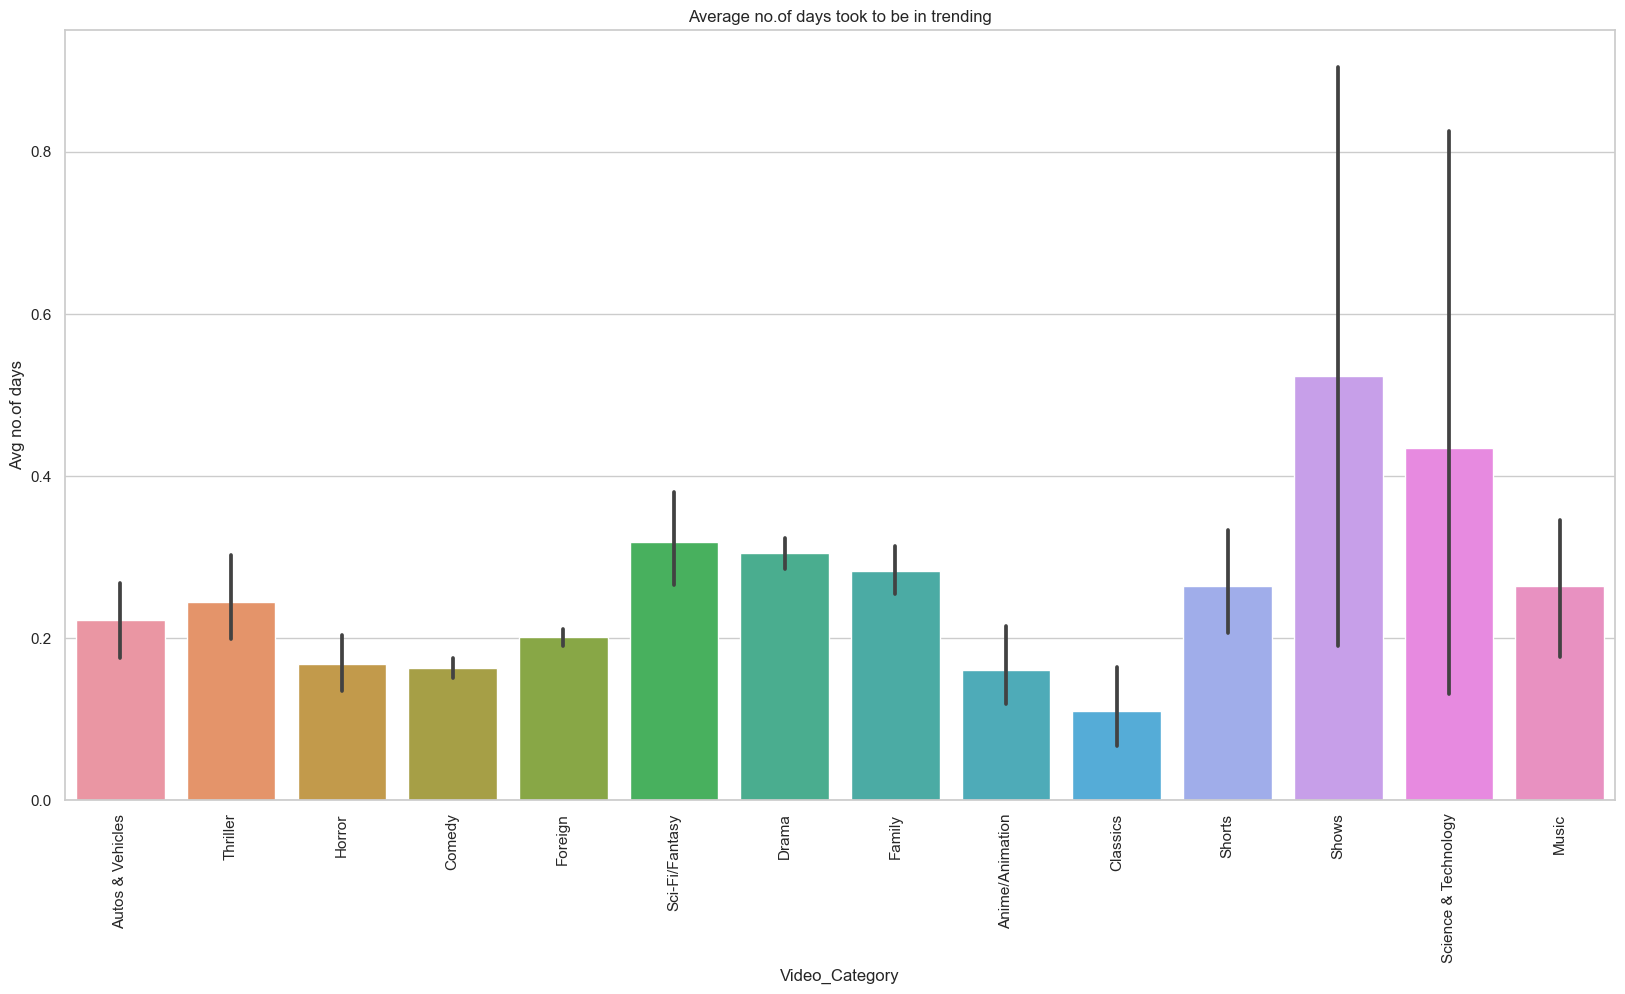

In [82]:
#Top 20 videos with most no.of times in trending(Channel wise)

# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Average no.of days took to be in trending")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=df_minViews.Video_Category, y=df_minViews['DaysTakenToBeOnTrending'])
#sns.violinplot(x = df_minViews.Video_Category, y = df_minViews.DaysTakenToBeOnTrending )

# Add label for vertical axis
plt.ylabel("Avg no.of days")